# Data mining 2024

## Authors

- Αρβανίτης Κωνσταντίνος - 1115201700007
- Κούκουζας Αντώνης - 1115201700059

## Preprocessing

### Import prerequisites

- Importing all libraries later used in the project
- Downloading nltk stopwords

In [149]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import folium
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


nltk.download('stopwords')


warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load files

- Loading files
- 2019 , 2023 folders must be in same path as python script
- Otherwise file path must be edited

In [150]:
april_2019 = pd.read_csv('2019/april/listings.csv')
february_2019 = pd.read_csv('2019/febrouary/listings.csv')
march_2019 = pd.read_csv('2019/march/listings.csv')

print(april_2019.shape)
print(february_2019.shape)
print(march_2019.shape)

june_2023 = pd.read_csv('2023/june/listings.csv')
march_2023 = pd.read_csv('2023/march/listings.csv')
september_2023 = pd.read_csv('2023/september/listings.csv')

(9661, 106)
(9100, 106)
(9361, 106)


- Printing rows and columns of month csvs

In [151]:
print('%5s %20s %20s %20s' % ('Year', 'Month', 'Rows', 'Columns'))
print('%5s %20s %20s %20s' % ('2019', 'April', april_2019.shape[0], april_2019.shape[1]))
print('%5s %20s %20s %20s' % ('2019', 'February', february_2019.shape[0], february_2019.shape[1]))
print('%5s %20s %20s %20s' % ('2019', 'March', march_2019.shape[0], march_2019.shape[1]))
print('%5s %20s %20s %20s' % ('2023', 'June', june_2023.shape[0], june_2023.shape[1]))
print('%5s %20s %20s %20s' % ('2023', 'March', march_2023.shape[0], march_2023.shape[1]))
print('%5s %20s %20s %20s' % ('2023', 'September', september_2023.shape[0], september_2023.shape[1]))

 Year                Month                 Rows              Columns
 2019                April                 9661                  106
 2019             February                 9100                  106
 2019                March                 9361                  106
 2023                 June                12345                   75
 2023                March                11382                   75
 2023            September                12955                   75


- Displaying number of rows by month
- Displaying number of columns by month

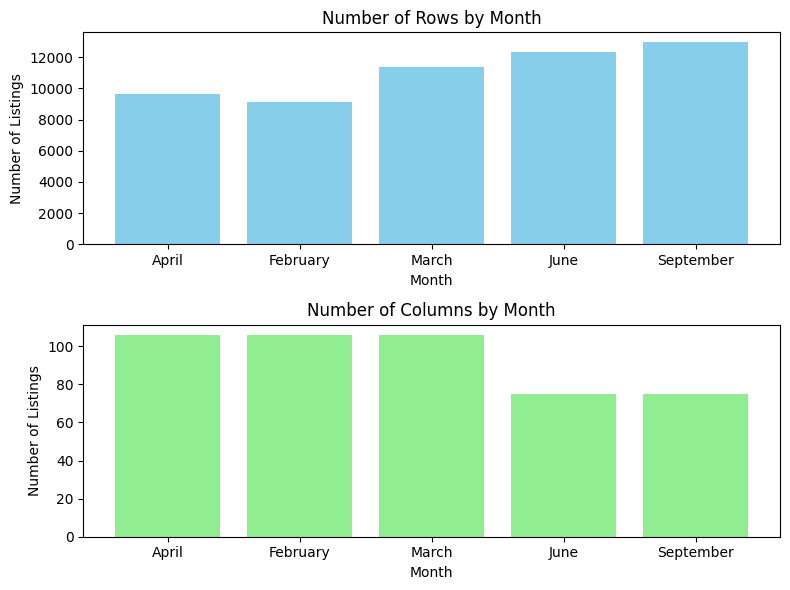

In [152]:
years = ['2019', '2019', '2019', '2023', '2023', '2023']
months = ['April', 'February', 'March', 'June', 'March', 'September']
rows = [april_2019.shape[0], february_2019.shape[0], march_2019.shape[0],
        june_2023.shape[0], march_2023.shape[0], september_2023.shape[0]]
columns = [april_2019.shape[1], february_2019.shape[1], march_2019.shape[1],
           june_2023.shape[1], march_2023.shape[1], september_2023.shape[1]]

fig, ax = plt.subplots(2, figsize=(8, 6))

ax[0].bar(months, rows, color='skyblue')
ax[0].set_title('Number of Rows by Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Listings')

ax[1].bar(months, columns, color='lightgreen')
ax[1].set_title('Number of Columns by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Listings')

plt.tight_layout()

plt.show()


### Merge datasets per year

#### 2019 post processing

- Merging datasets for year 2019
- Keeping only columns mentioned in project description
- Saving merged csv as year 2019 to output folder

In [153]:
april_2019['month']='april'
february_2019['month']='february'
march_2019['month']='march'

columns_to_keep = [
    'id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review',
    'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price',
    'availability_365', 'minimum_nights', 'month', 'host_id'
]

year2019 = pd.concat([april_2019, february_2019, march_2019])

year2019.reset_index(drop=True, inplace=True)

year2019 = year2019[columns_to_keep]

year2019.to_csv('output/train_2019.csv', index=False)

In [154]:
year2019.dtypes

id                          int64
zipcode                    object
transit                    object
bedrooms                  float64
beds                      float64
review_scores_rating      float64
number_of_reviews           int64
neighbourhood              object
neighbourhood_cleansed     object
name                       object
latitude                  float64
longitude                 float64
last_review                object
instant_bookable           object
host_since                 object
host_response_rate         object
host_identity_verified     object
host_has_profile_pic       object
first_review               object
description                object
city                       object
cancellation_policy        object
bed_type                   object
bathrooms                 float64
accommodates                int64
amenities                  object
room_type                  object
property_type              object
price                      object
availability_3

#### 2023 post processing


- Merging datasets for year 2023
- Keeping only columns mentioned in project description
- Saving merged csv as year 2023 to output folder

In [155]:
september_2023['month']='september'
march_2023['month']='march'
june_2023['month']='june'

columns_to_keep = [
    'id', 'bedrooms', 'beds', 'review_scores_rating',
    'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
    'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
    'host_identity_verified', 'host_has_profile_pic', 'first_review',
    'description', 'bathrooms',
    'accommodates', 'amenities', 'room_type', 'property_type', 'price',
    'availability_365', 'minimum_nights', 'month', 'host_id'
]

year2023 = pd.concat([september_2023, march_2023, june_2023])

year2023.reset_index(drop=True, inplace=True)

year2023 = year2023[columns_to_keep]

year2023.to_csv('output/train_2023.csv', index=False)

### Null values

#### Null values in 2019

- Displaying null values sum per column

In [156]:
null_values = year2019.isnull().sum()

print('Null values in 2019', null_values)

Null values in 2019 id                           0
zipcode                    918
transit                   8910
bedrooms                    12
beds                        31
review_scores_rating      6917
number_of_reviews            0
neighbourhood              261
neighbourhood_cleansed       0
name                        30
latitude                     0
longitude                    0
last_review               6722
instant_bookable             0
host_since                   2
host_response_rate        5055
host_identity_verified       2
host_has_profile_pic         2
first_review              6722
description                289
city                         9
cancellation_policy          0
bed_type                     0
bathrooms                    0
accommodates                 0
amenities                    0
room_type                    0
property_type                0
price                        0
availability_365             0
minimum_nights               0
month              

#### Null values in 2023

- Displaying null values sum per column

In [157]:
null_values = year2023.isnull().sum()

print('Null values in 2023', null_values)

Null values in 2023 id                            0
bedrooms                   3701
beds                        328
review_scores_rating       5966
number_of_reviews             0
neighbourhood             13645
neighbourhood_cleansed        0
name                          1
latitude                      0
longitude                     0
last_review                5969
instant_bookable              0
host_since                    7
host_response_rate         5256
host_identity_verified        7
host_has_profile_pic          7
first_review               5969
description                 107
bathrooms                 36682
accommodates                  0
amenities                     0
room_type                     0
property_type                 0
price                         0
availability_365              0
minimum_nights                0
month                         0
host_id                       0
dtype: int64


### Clean up

Clean up functions:

In [158]:
def remove_html_tags(text):
    text = str(text)
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#### Cleanup 2019

- Removing null values from important columns

In [159]:
year2019_important=['id', 'name', 'latitude', 'longitude', 'host_identity_verified', 'cancellation_policy', 'property_type', 'price' , 'city', 'neighbourhood']

year2019 = year2019.dropna(subset=year2019_important)

null_values = year2019.isnull().sum()

print('Null values in 2019', null_values)


Null values in 2019 id                           0
zipcode                    890
transit                   8792
bedrooms                    12
beds                        31
review_scores_rating      6829
number_of_reviews            0
neighbourhood                0
neighbourhood_cleansed       0
name                         0
latitude                     0
longitude                    0
last_review               6635
instant_bookable             0
host_since                   0
host_response_rate        4983
host_identity_verified       0
host_has_profile_pic         0
first_review              6635
description                289
city                         0
cancellation_policy          0
bed_type                     0
bathrooms                    0
accommodates                 0
amenities                    0
room_type                    0
property_type                0
price                        0
availability_365             0
minimum_nights               0
month              

- Removing html tags from description column

In [160]:
year2019['description'] = year2019['description'].apply(remove_html_tags)

<ipython-input-158-6d22c7e2becc>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


#### Cleanup 2023

- Removing null values from important columns

In [161]:
year2023_important=['id', 'name', 'latitude', 'longitude', 'host_identity_verified', 'property_type', 'price', 'neighbourhood']

year2023 = year2023.dropna(subset=year2023_important)

null_values = year2023.isnull().sum()

print('Null values in 2023', null_values)

Null values in 2023 id                            0
bedrooms                   2300
beds                        153
review_scores_rating       2466
number_of_reviews             0
neighbourhood                 0
neighbourhood_cleansed        0
name                          0
latitude                      0
longitude                     0
last_review                2467
instant_bookable              0
host_since                    0
host_response_rate         2831
host_identity_verified        0
host_has_profile_pic          0
first_review               2467
description                   9
bathrooms                 23031
accommodates                  0
amenities                     0
room_type                     0
property_type                 0
price                         0
availability_365              0
minimum_nights                0
month                         0
host_id                       0
dtype: int64


- Removing html tags from description column

In [162]:
year2023['description'] = year2023['description'].apply(remove_html_tags)

### Price to Float

- Converting price to fload is string in csv

In [163]:

year2019['price'] = year2019['price'].apply(lambda x: re.sub(r'[^0-9.]', '', x))
year2019['price'] = year2019['price'].astype(float)


year2023['price'] = year2023['price'].apply(lambda x: re.sub(r'[^0-9.]', '', x))
year2023['price'] = year2023['price'].astype(float)

## Part 1 - Problems

### 1.1 Most frequent room type

- Calculate most frequent room type with value counts
- Display result as bar diagram

#### Year 2019

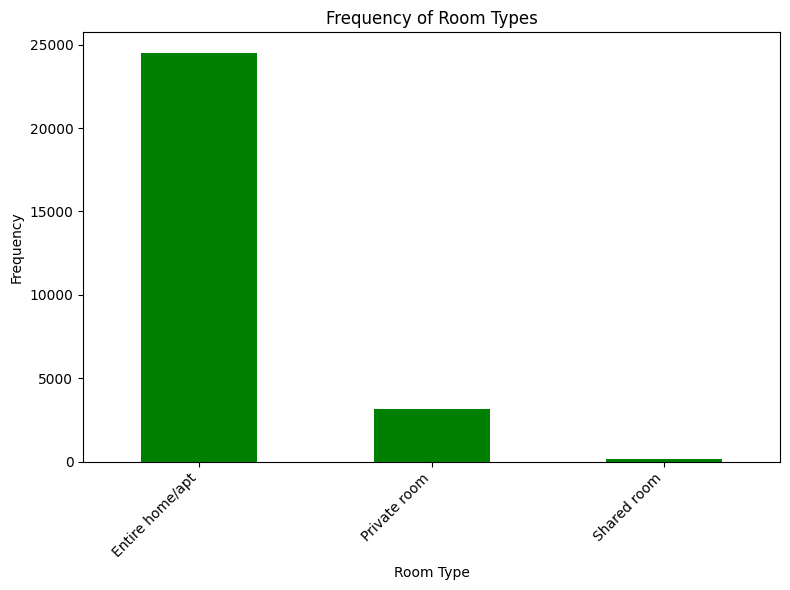

In [164]:
room_type_counts = year2019['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='green')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Year 2023

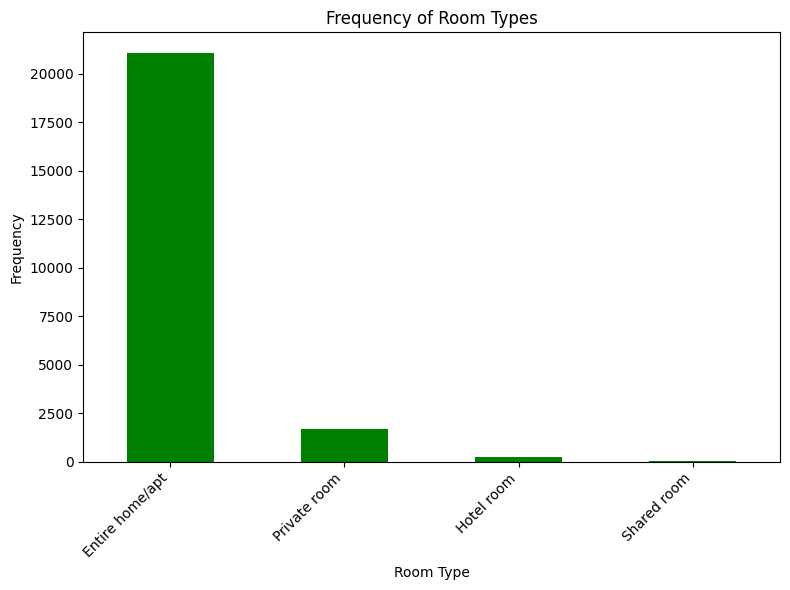

In [165]:
room_type_counts = year2023['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='green')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 1.2 Price Graph per month

- Calculate mean price per month
- Display results in bar diagram

#### Year 2019

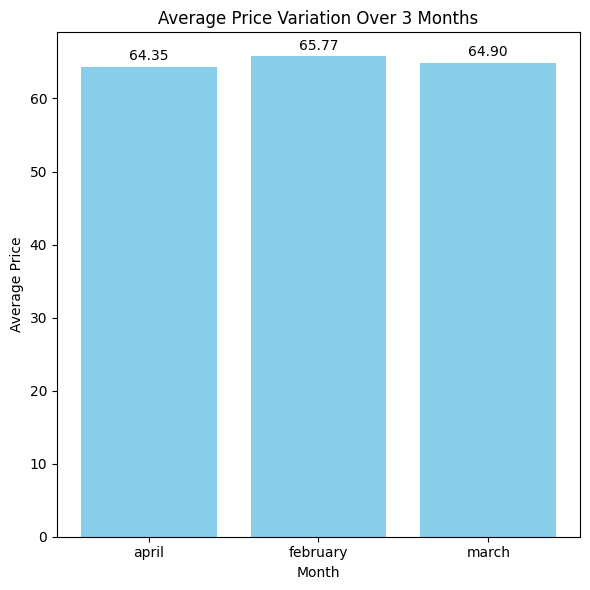

In [166]:
monthly_prices_2019 = year2019.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(6, 6))
plt.bar(monthly_prices_2019['month'], monthly_prices_2019['price'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Variation Over 3 Months')

for i, price in enumerate(monthly_prices_2019['price']):
    plt.text(i, price + 0.5, f'{price:.2f}', ha='center', va='bottom')

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### Year 2023

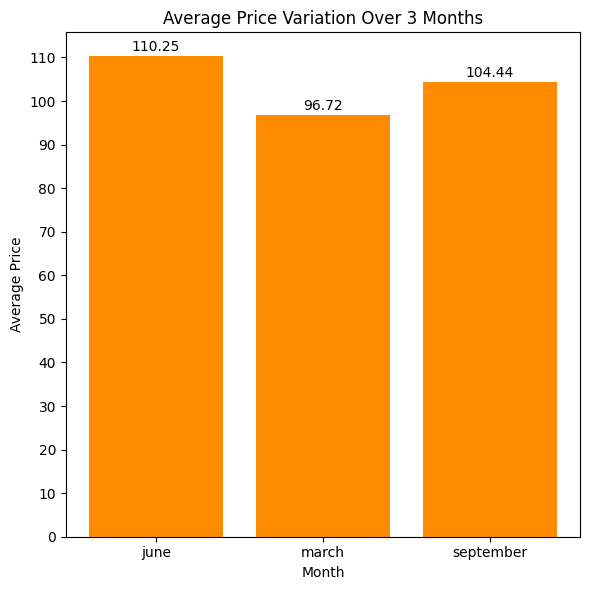

In [167]:
monthly_prices_2023 = year2023.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(6, 6))
plt.bar(monthly_prices_2023['month'], monthly_prices_2023['price'], color='darkorange')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Variation Over 3 Months')

for i, price in enumerate(monthly_prices_2023['price']):
    plt.text(i, price + 0.5, f'{price:.2f}', ha='center', va='bottom')

plt.ylim(bottom=0)
plt.yticks(range(0, int(max(monthly_prices_2023['price'])) + 1, 10))
plt.tight_layout()
plt.show()

### 1.3 Top 5 neighbourhoods with most reviews

- Groups and sums reviews by neighborhood.
- Finds top 5 neighborhoods with highest review counts.
- Bar chart of top 5 neighborhoods by reviews.

#### Year 2019

In [168]:
neighborhood_review_counts = year2019.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

top_5 = neighborhood_review_counts.nlargest(5)

print(top_5)

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              165477
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  89666
ΝΕΟΣ ΚΟΣΜΟΣ                          68681
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             59107
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     49199
Name: number_of_reviews, dtype: int64


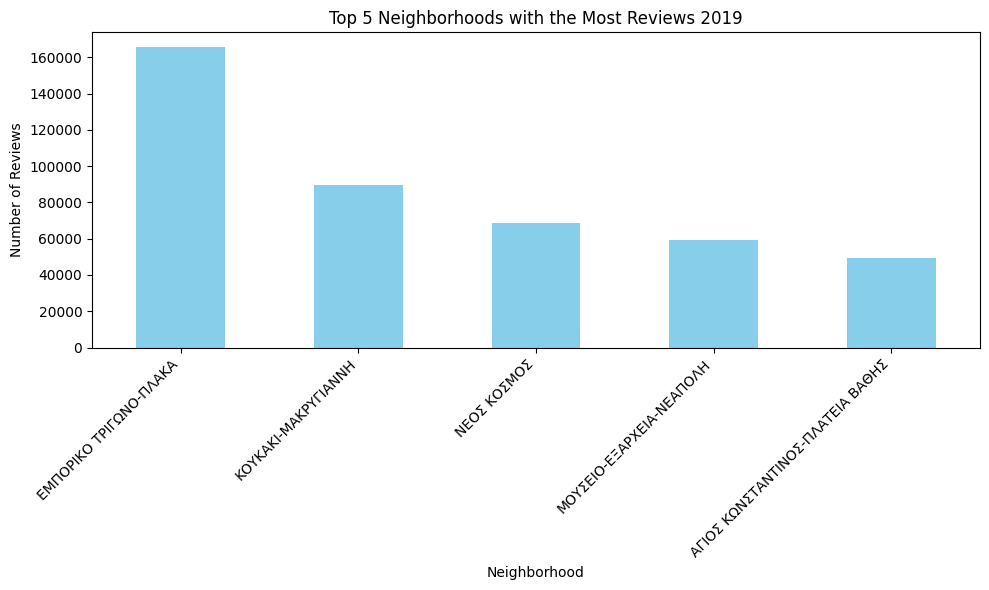

In [169]:
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Neighborhoods with the Most Reviews 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Year 2023

In [170]:
neighborhood_review_counts1 = year2023.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

top_5_2023 = neighborhood_review_counts1.nlargest(5)

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              356056
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 181798
ΝΕΟΣ ΚΟΣΜΟΣ                         101286
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     82974
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             79537
Name: number_of_reviews, dtype: int64


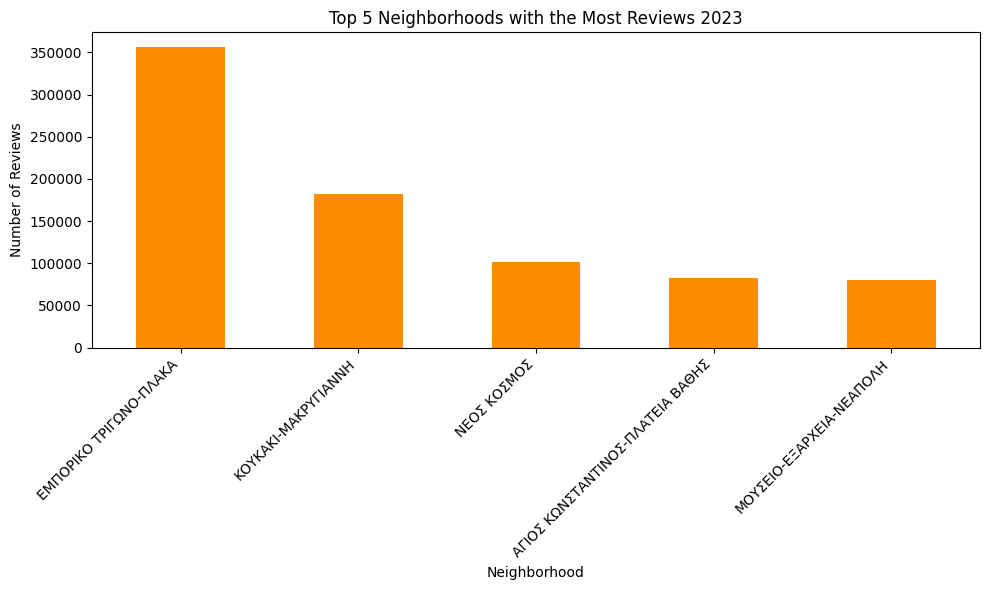

In [171]:
print(top_5_2023)
plt.figure(figsize=(10, 6))
top_5_2023.plot(kind='bar', color='darkorange')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Neighborhoods with the Most Reviews 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.4 Neighbourhood with most entries

- Counts occurrences of each neighborhood.
- Identifies the neighborhood with most entries.
- Creates DataFrame with top neighborhood data.

#### Year 2019

In [172]:
neighbourhood_2019_count = year2019['neighbourhood_cleansed'].value_counts()

max_neighbourhood_2019 = neighbourhood_2019_count.idxmax()
max_count_2019 = neighbourhood_2019_count.max()

data_2019 = {
    "Neighbourhood": [max_neighbourhood_2019],
    "Entries": [max_count_2019],
    "Year": [2019]
}

df_2019 = pd.DataFrame(data_2019)

print(df_2019)

            Neighbourhood  Entries  Year
0  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     4160  2019


#### Year 2023

In [173]:
neighbourhood_2023_count = year2023['neighbourhood_cleansed'].value_counts()

max_neighbourhood_2023 = neighbourhood_2023_count.idxmax()
max_count_2023 = neighbourhood_2023_count.max()

data_2023 = {
    "Neighbourhood": [max_neighbourhood_2023],
    "Entries": [max_count_2023],
    "Year": [2023]
}

df_2023 = pd.DataFrame(data_2023)

print(df_2023)

            Neighbourhood  Entries  Year
0  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     4504  2023


### 1.5 Entities Per month and per Neighbourhood

- Groups and sorts entries by month and neighborhood.
- Prepares data for heatmap visualization.
- Creates heatmap of entries per month/neighborhood.


#### Year 2019

In [174]:
entries_per_month_and_neighbourhood = year2019.groupby(['month', 'neighbourhood_cleansed']).size().reset_index(name='entries_count')
sorted_entries = entries_per_month_and_neighbourhood.sort_values(by='entries_count', ascending=False)

        month  neighbourhood_cleansed  entries_count
15      april  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1458
103     march  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1352
59   february  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1350
23      april     ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ            803
111     march     ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ            775
..        ...                     ...            ...
38      april                ΠΡΟΜΠΟΝΑ             10
82   february                ΠΡΟΜΠΟΝΑ              8
121     march               ΠΕΝΤΑΓΩΝΟ              4
33      april               ΠΕΝΤΑΓΩΝΟ              4
77   february               ΠΕΝΤΑΓΩΝΟ              3

[132 rows x 3 columns]


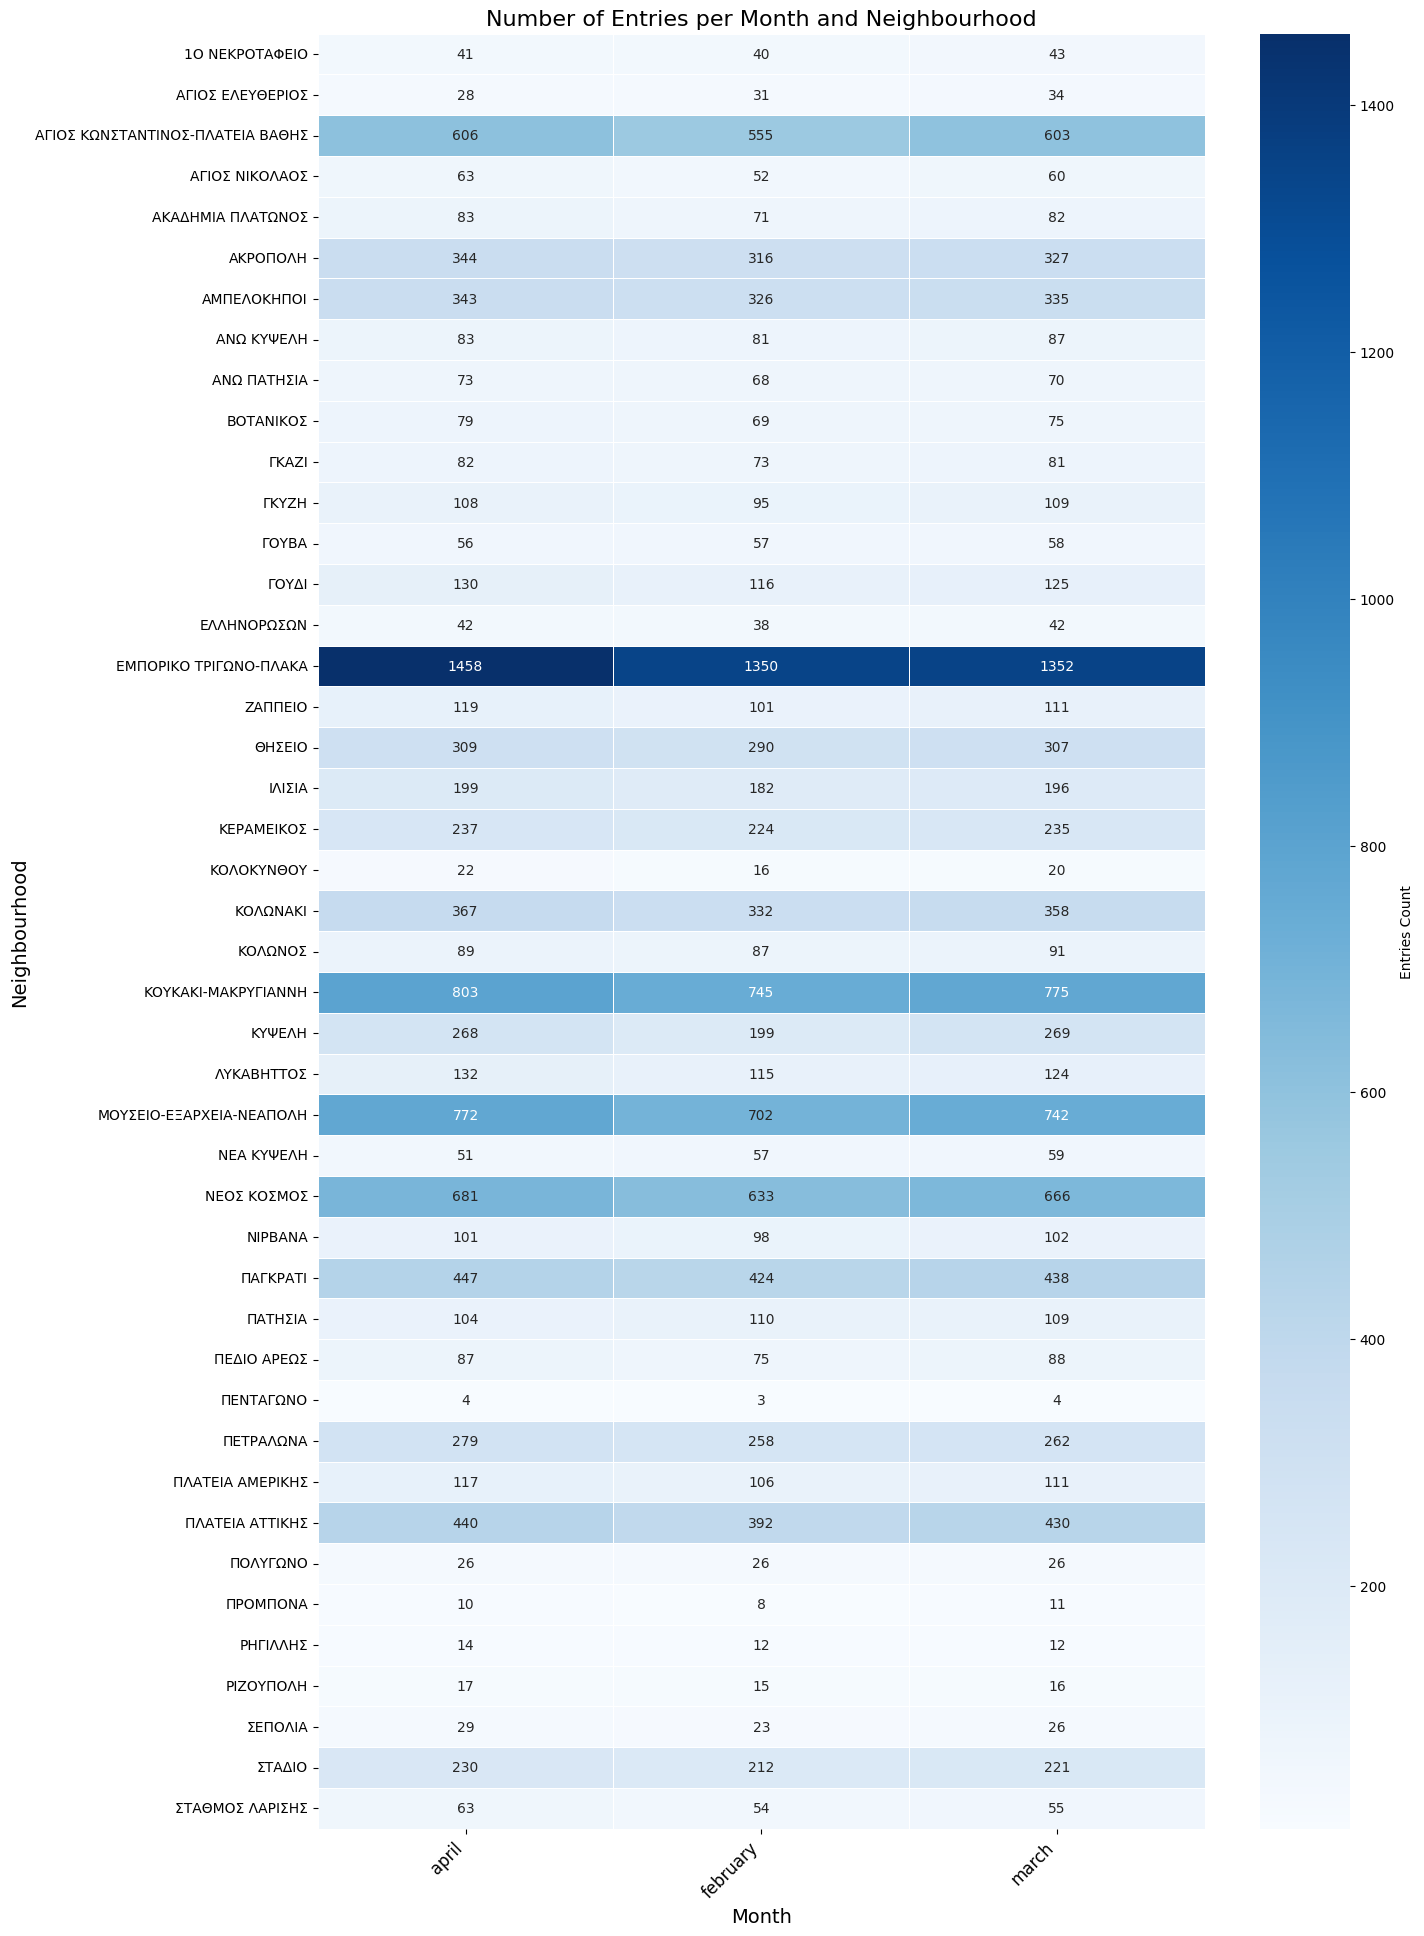

In [175]:
print(sorted_entries)

plt.figure(figsize=(15, 20))
heatmap_data = sorted_entries.pivot(index="neighbourhood_cleansed",columns="month",values="entries_count")

sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Entries Count'})

plt.title("Number of Entries per Month and Neighbourhood", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Neighbourhood", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)

plt.tight_layout(pad=3)
plt.show()

#### Year 2023

In [176]:
entries_per_month_and_neighbourhood2023 = year2023.groupby(['month', 'neighbourhood_cleansed']).size().reset_index(name='entries_count')
sorted_entries2023 = entries_per_month_and_neighbourhood2023.sort_values(by='entries_count', ascending=False)
print(sorted_entries2023)

         month  neighbourhood_cleansed  entries_count
103  september  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1541
15        june  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1502
59       march  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ           1461
111  september     ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ            795
23        june     ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ            761
..         ...                     ...            ...
38        june                ΠΡΟΜΠΟΝΑ              3
33        june               ΠΕΝΤΑΓΩΝΟ              2
121  september               ΠΕΝΤΑΓΩΝΟ              2
77       march               ΠΕΝΤΑΓΩΝΟ              2
82       march                ΠΡΟΜΠΟΝΑ              2

[132 rows x 3 columns]


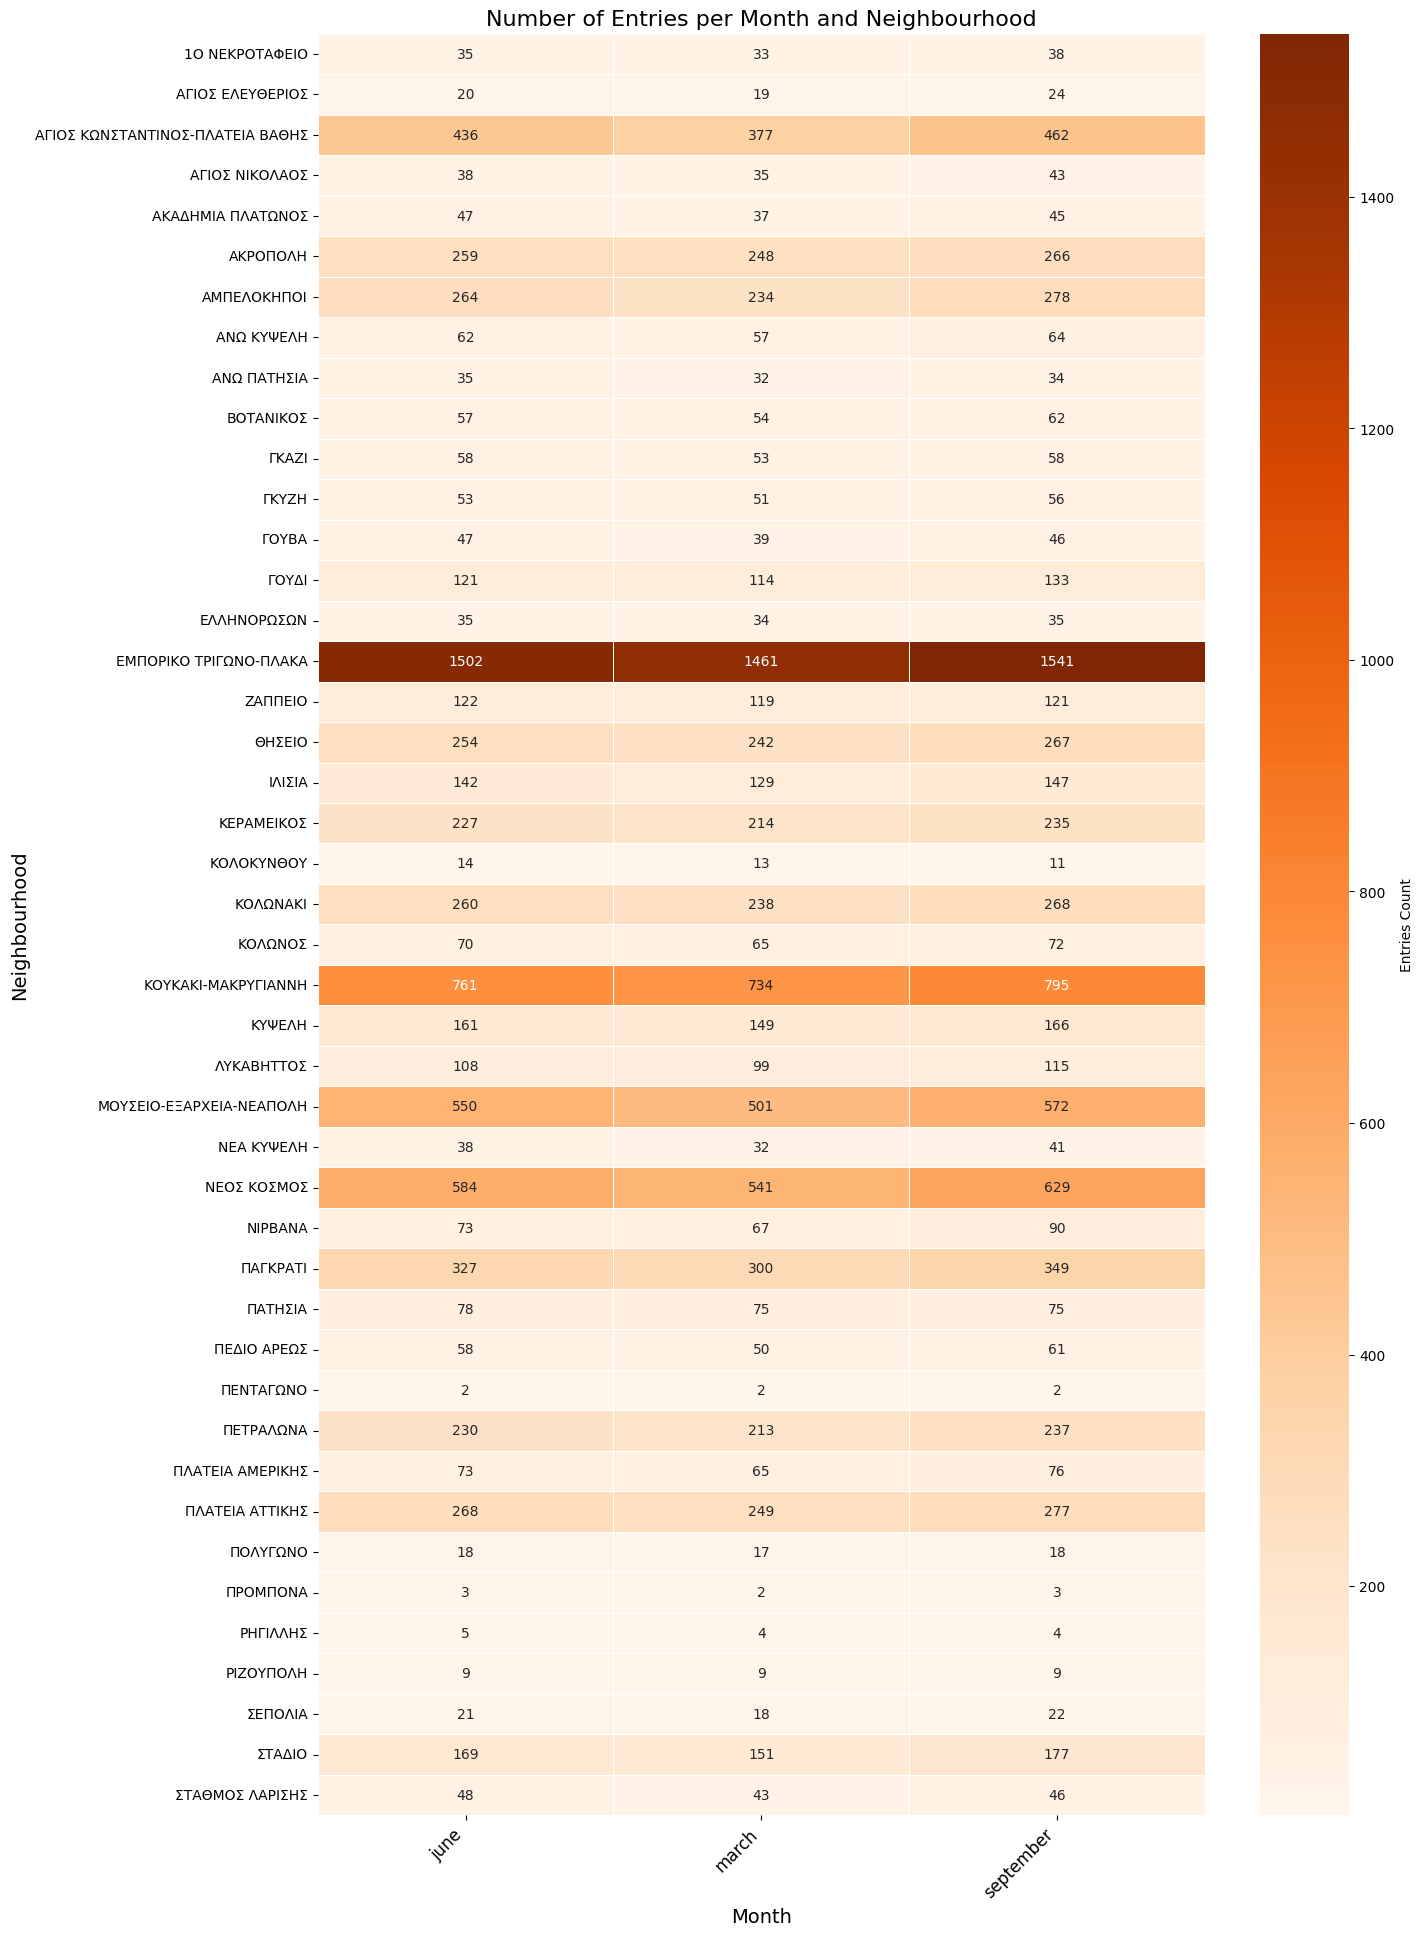

In [177]:
plt.figure(figsize=(15, 20))
heatmap_data = sorted_entries2023.pivot(index="neighbourhood_cleansed",columns="month",values="entries_count")

sns.heatmap(heatmap_data, cmap="Oranges", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Entries Count'})

plt.title("Number of Entries per Month and Neighbourhood", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Neighbourhood", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)

plt.tight_layout(pad=3)
plt.show()

### 1.6  Histogram of Neighbourhood

- Counts occurrences of each neighborhood in 2019.
- Plots neighborhood counts as a bar chart.
- Adds count labels to each bar in the chart.


#### Year 2019

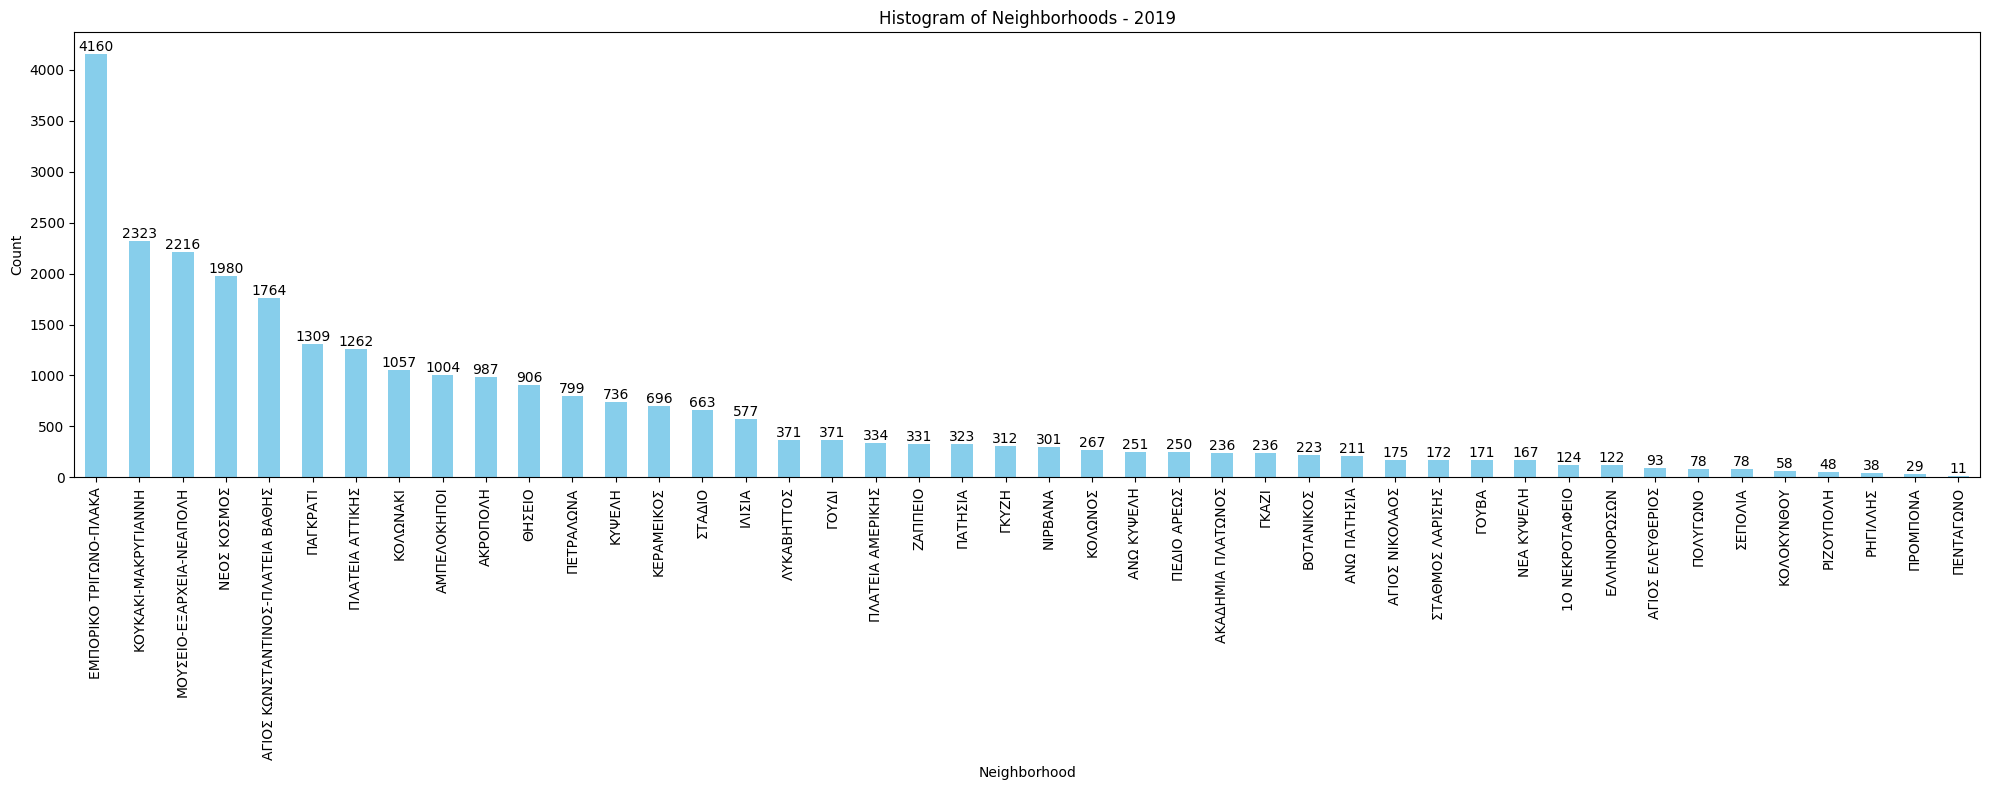

In [178]:
neighbourhood_counts = year2019['neighbourhood_cleansed'].value_counts()

plt.figure(figsize=(20, 8))
neighbourhood_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(neighbourhood_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Histogram of Neighborhoods - 2019')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Year 2023

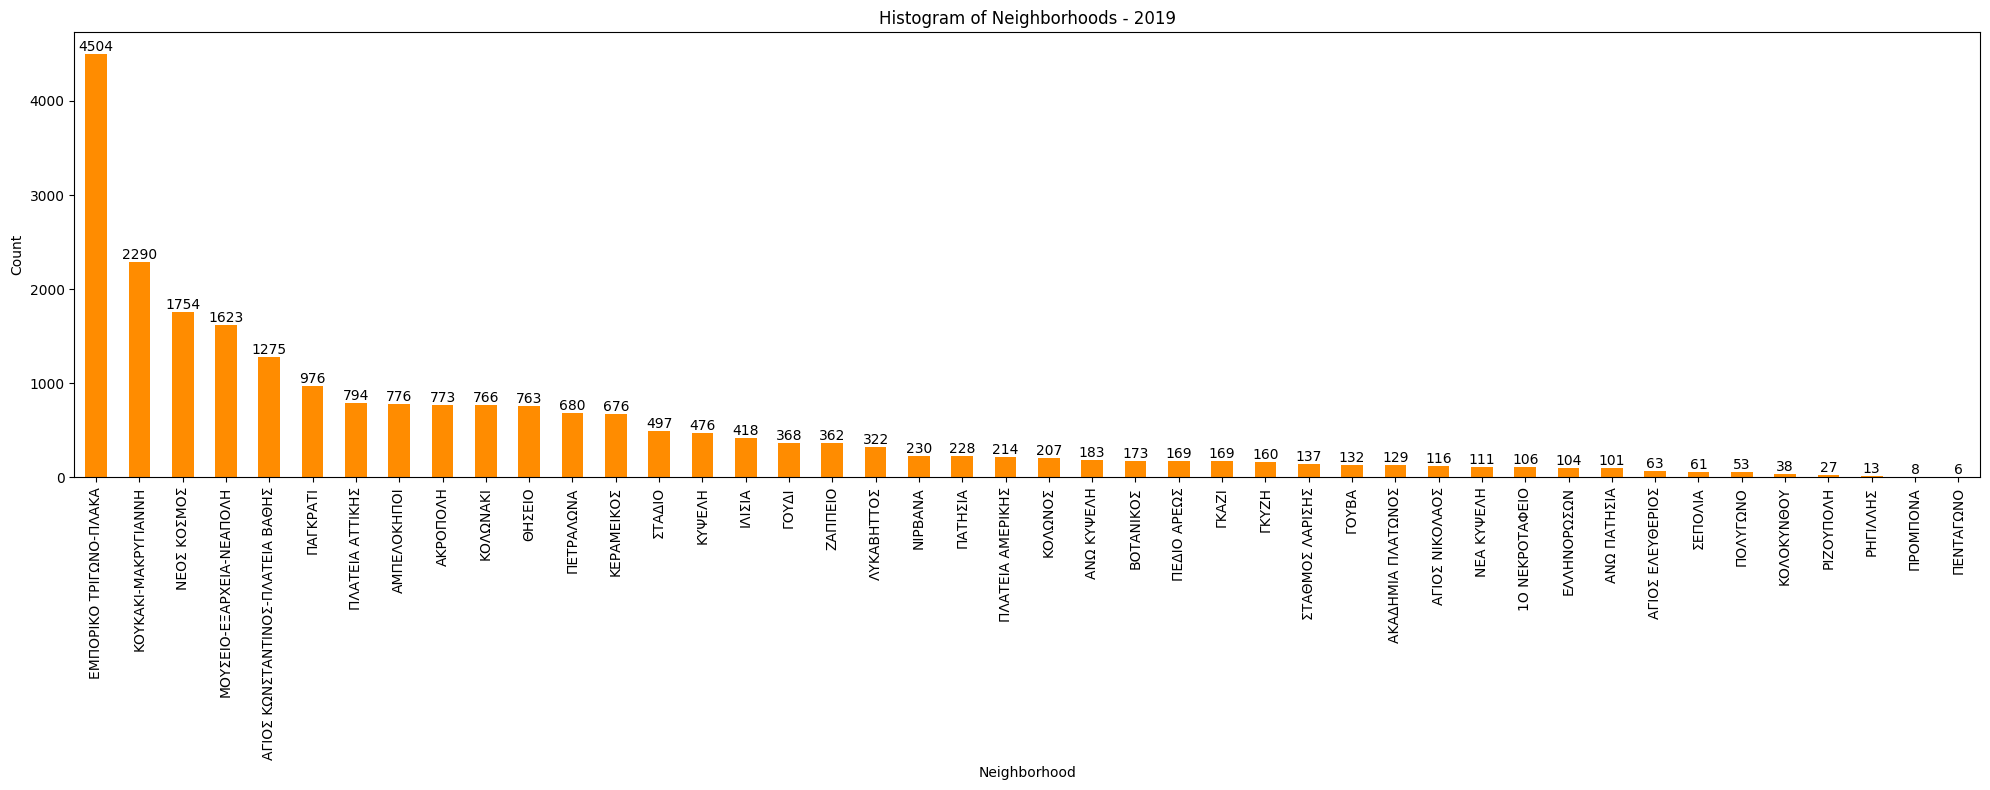

In [179]:
neighbourhood_counts = year2023['neighbourhood_cleansed'].value_counts()

plt.figure(figsize=(20, 8))
neighbourhood_counts.plot(kind='bar', color='darkorange')

for i, count in enumerate(neighbourhood_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Histogram of Neighborhoods - 2019')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 1.7 Most frequent room type per neighbourhoud

- Groups and counts room types by neighborhood.
- Plots room type frequencies in neighborhoods.
- Adds legend and formats bar chart for clarity.

#### Year 2019

In [180]:
room_type_counts = year2019.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

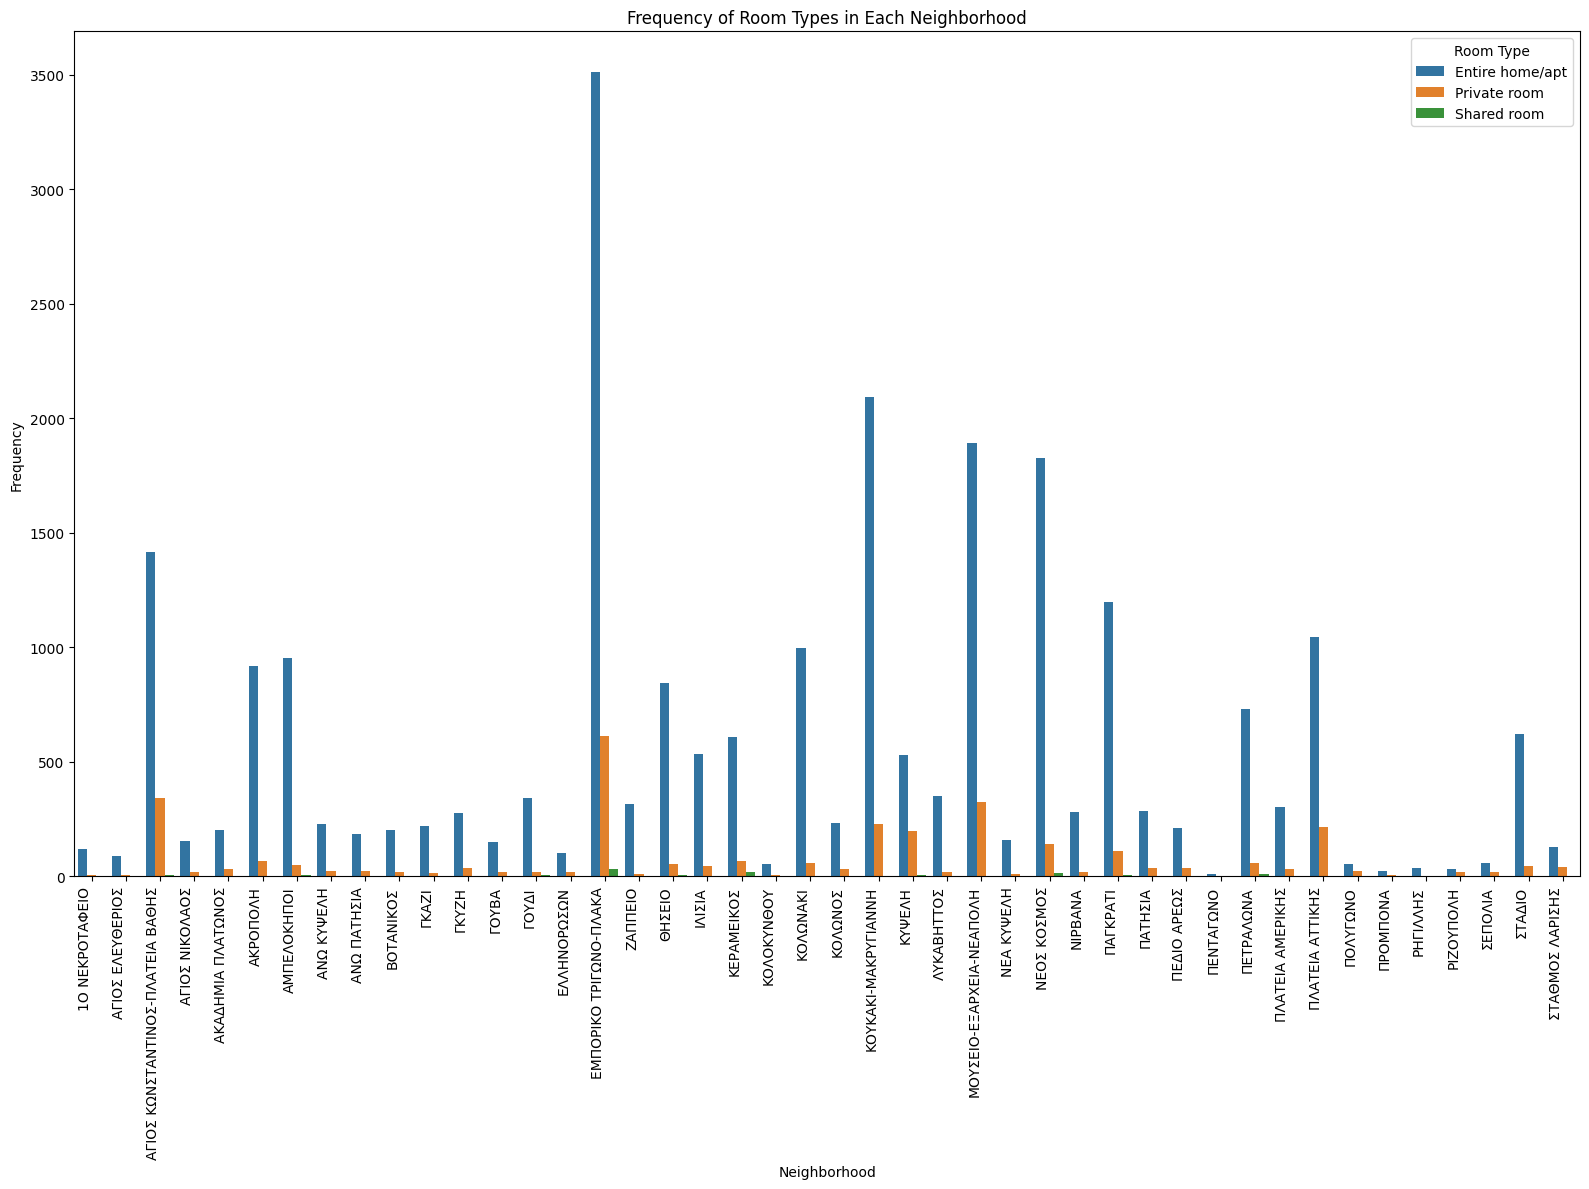

In [181]:
plt.figure(figsize=(16, 12))
sns.barplot(data=room_type_counts, x='neighbourhood_cleansed', y='count', hue='room_type')
plt.title('Frequency of Room Types in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Room Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Year 2023

In [182]:
room_type_counts = year2023.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

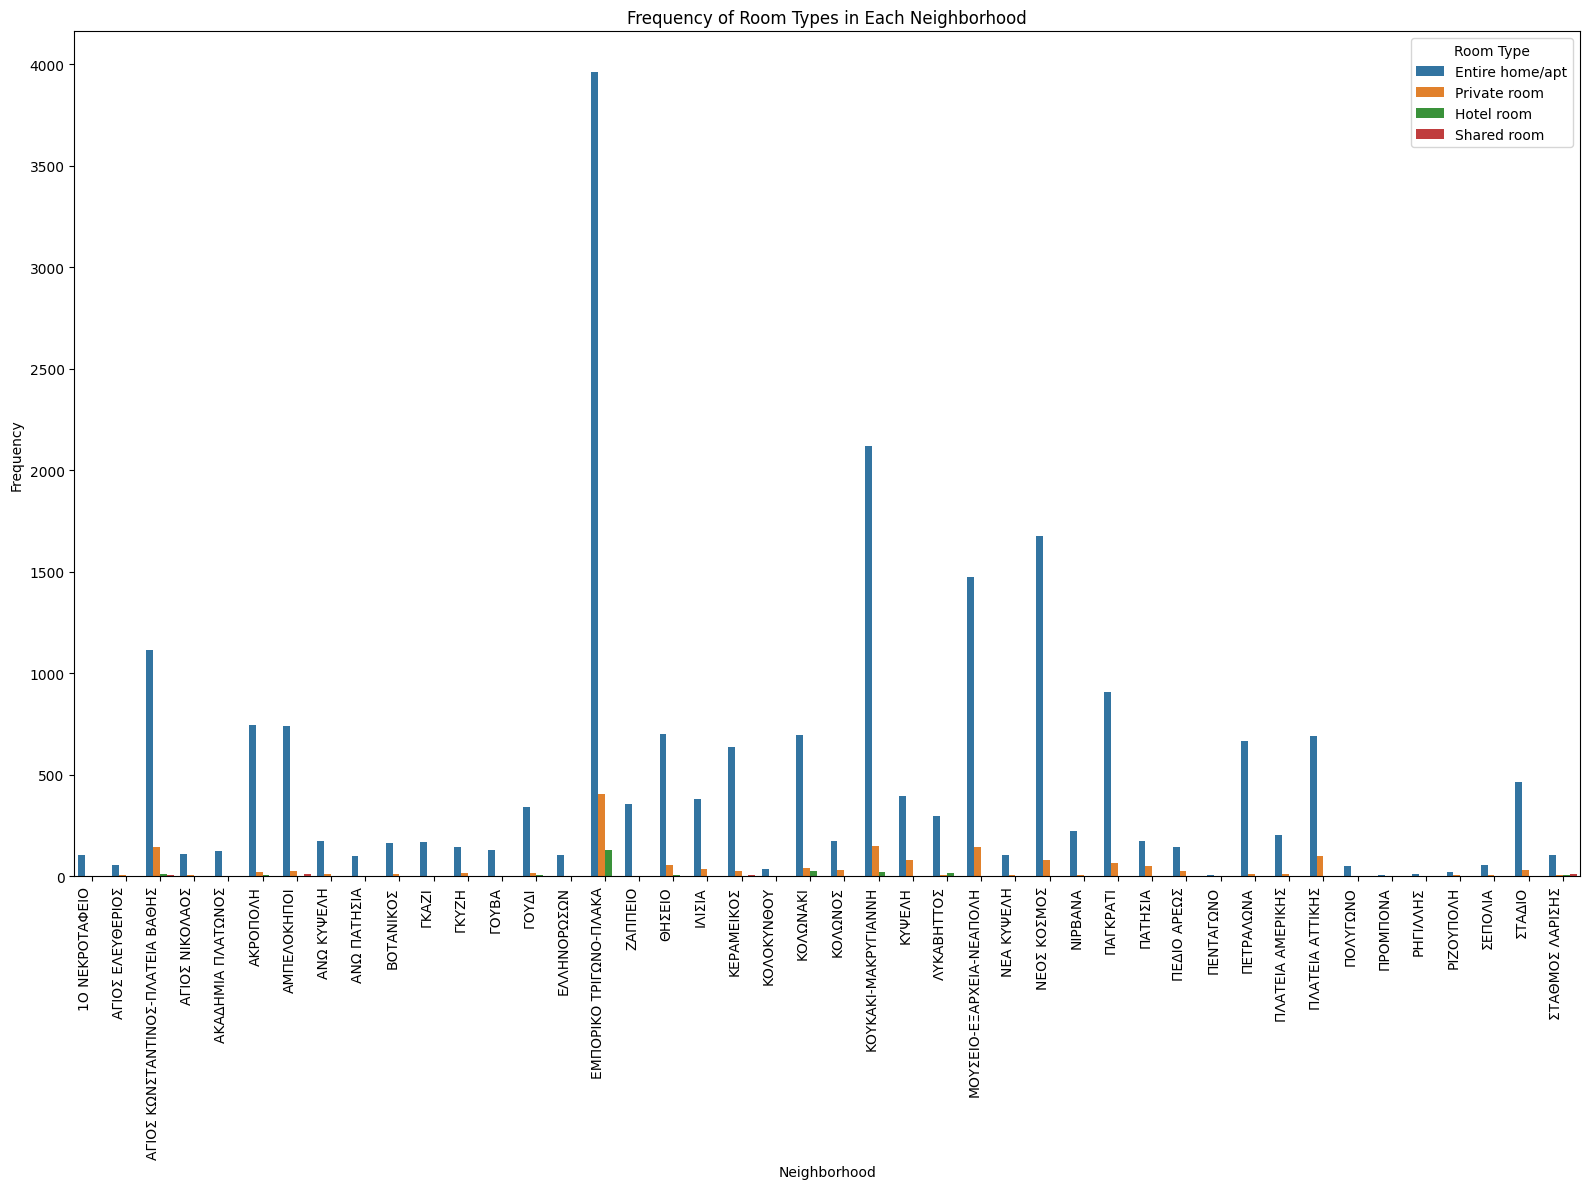

In [183]:
plt.figure(figsize=(16, 12))
sns.barplot(data=room_type_counts, x='neighbourhood_cleansed', y='count', hue='room_type')
plt.title('Frequency of Room Types in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Room Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### 1.8 Most expensive room type

- Calculates mean prices for each room type.
- Finds room type with highest mean price.
- Creates DataFrame with room type mean prices.


#### Year 2019

In [184]:
room_type_prices = year2019.groupby('room_type')['price'].mean().round(2)
max_room_type_price = room_type_prices.idxmax()
highest_mean_price = room_type_prices.max()

room_type_prices_df = room_type_prices.reset_index()
room_type_prices_df.columns = ['Room Type', 'Mean Price']

max_price_room_type_df = room_type_prices_df[room_type_prices_df['Room Type'] == max_room_type_price]

print("Room Type with Maximum Mean Price:")
print(max_price_room_type_df)

Room Type with Maximum Mean Price:
      Room Type  Mean Price
1  Private room       81.06


#### Year 2023

In [185]:
room_type_prices = year2023.groupby('room_type')['price'].mean().round(2)
max_room_type_price = room_type_prices.idxmax()
highest_mean_price = room_type_prices.max()

room_type_prices_df = room_type_prices.reset_index()
room_type_prices_df.columns = ['Room Type', 'Mean Price']

max_price_room_type_df = room_type_prices_df[room_type_prices_df['Room Type'] == max_room_type_price]

print("Room Type with Maximum Mean Price:")
print(max_price_room_type_df)

Room Type with Maximum Mean Price:
    Room Type  Mean Price
1  Hotel room      316.17


### 1.9 Map with mean coordinates

- Selects data for March 2023.
- Initializes Folium map with mean coordinates.
- Adds markers for each property with popup info.


In [186]:
month_data = year2023[year2023['month'] == 'march']

map = folium.Map(location=[month_data['latitude'].mean(), month_data['longitude'].mean()], zoom_start=10)

for index, row in month_data.iterrows():
    if 'transit' in row:
        popup_text = f"<b>{row['name']}</b><br>Room Type: {row['room_type']}<br>Transit: {row['transit']}"
    else:
        popup_text = f"<b>{row['name']}</b><br>Room Type: {row['room_type']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(map)

map.save('properties_map.html')

### 1.10 Wordcloud for Neighbourhood , Transit , Description , Last Review

- Implemented a wordcloud function
- Generates a word cloud from neighborhood data.
- Generates a word cloud from description data.
- Generates a word cloud from transit data.
- Generates a word cloud from last_review data after extracting the month from the date.

#### WordCloud Function

In [187]:
def generate_wordcloud(data, title):
    data = data.split(' ')
    word_freq = Counter(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

#### Year 2019

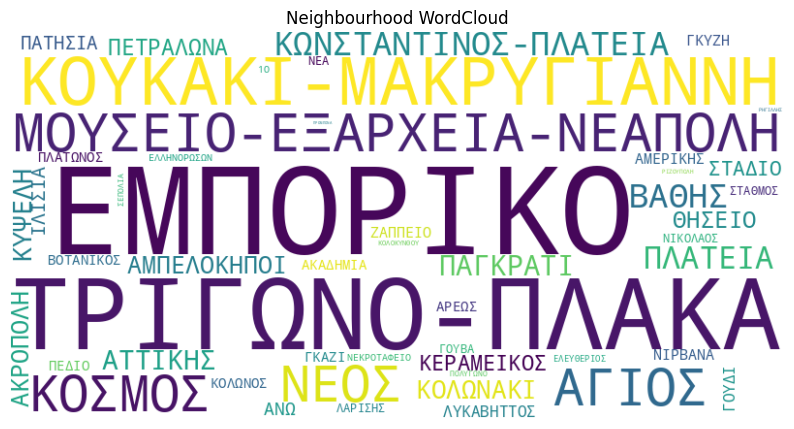

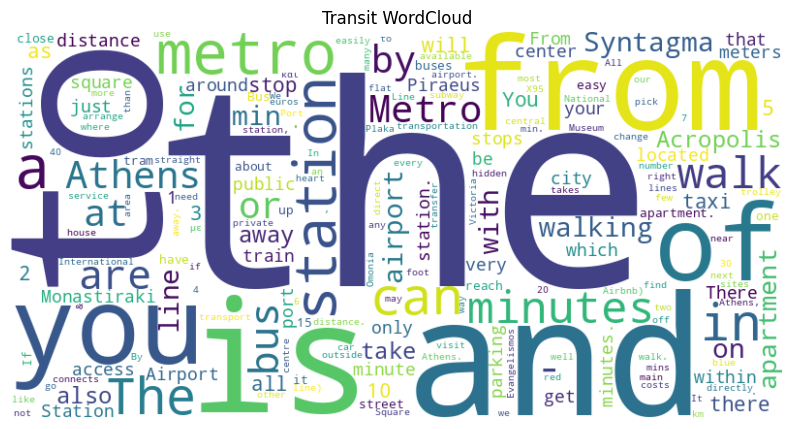

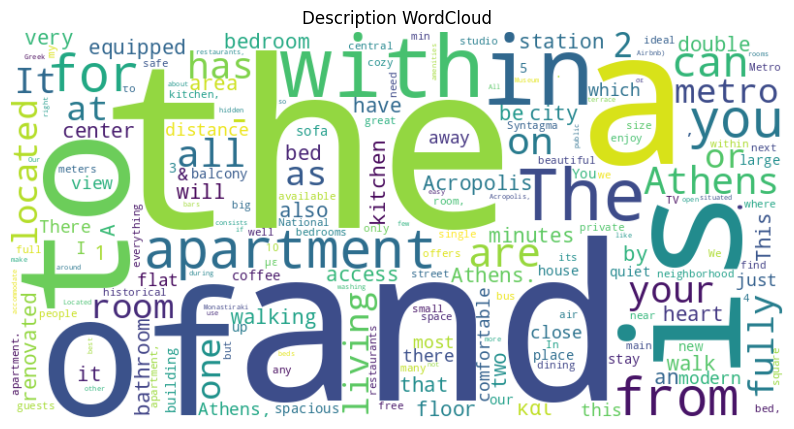

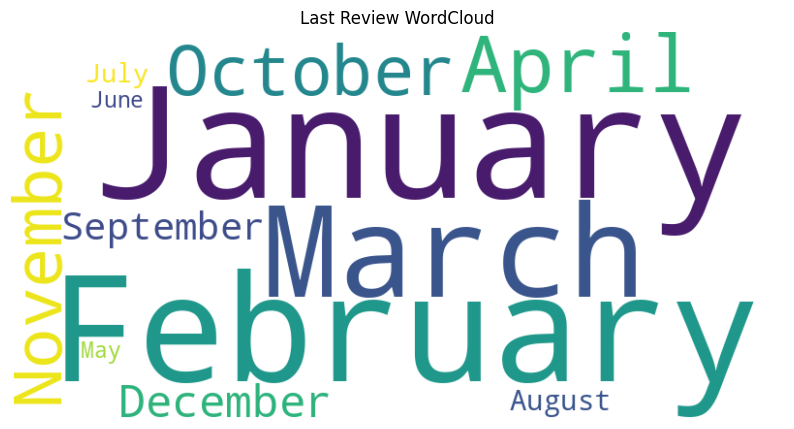

In [188]:
neighbourhood_text = ' '.join(year2019['neighbourhood_cleansed'].dropna().astype(str))
generate_wordcloud(neighbourhood_text, 'Neighbourhood WordCloud')

transit_text = ' '.join(year2019['transit'].dropna().astype(str))
generate_wordcloud(transit_text, 'Transit WordCloud')

description_text = ' '.join(year2019['description'].dropna().astype(str))
generate_wordcloud(description_text, 'Description WordCloud')

last_review_text = ' '.join(pd.to_datetime(year2019['last_review'].dropna().astype(str)).dt.strftime('%B'))
generate_wordcloud(last_review_text, 'Last Review WordCloud')

#### Last review , from reviews.csv

In [189]:
april_2019_reviews = pd.read_csv('2019/april/reviews.csv')
february_2019_reviews = pd.read_csv('2019/febrouary/reviews.csv')
march_2019_reviews = pd.read_csv('2019/march/reviews.csv')

june_2023_reviews = pd.read_csv('2023/june/reviews.csv')
march_2023_reviews = pd.read_csv('2023/march/reviews.csv')
september_2023_reviews = pd.read_csv('2023/september/reviews.csv')

year2019_reviews = pd.concat([april_2019_reviews, february_2019_reviews, march_2019_reviews])
year2019_reviews.reset_index(drop=True, inplace=True)

year2023_reviews = pd.concat([september_2023_reviews, march_2023_reviews, june_2023_reviews])
year2023_reviews.reset_index(drop=True, inplace=True)

#### Year 2019 Last Review WordCloud

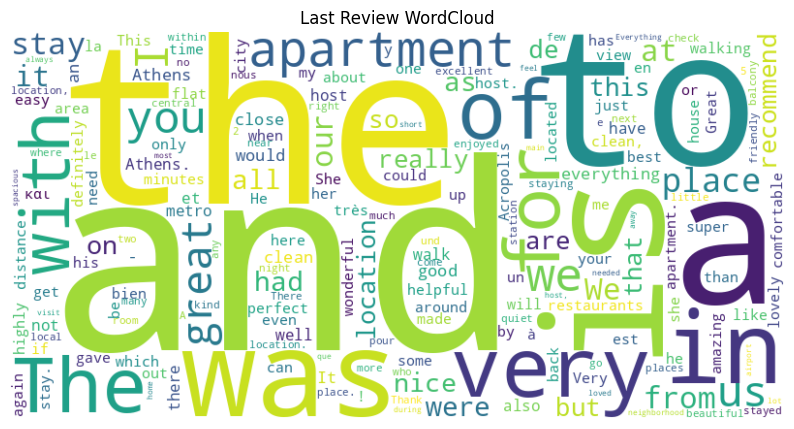

In [190]:
last_review_text = ' '.join(year2019_reviews['comments'].dropna().astype(str))
generate_wordcloud(last_review_text, 'Last Review WordCloud')

#### Year 2023

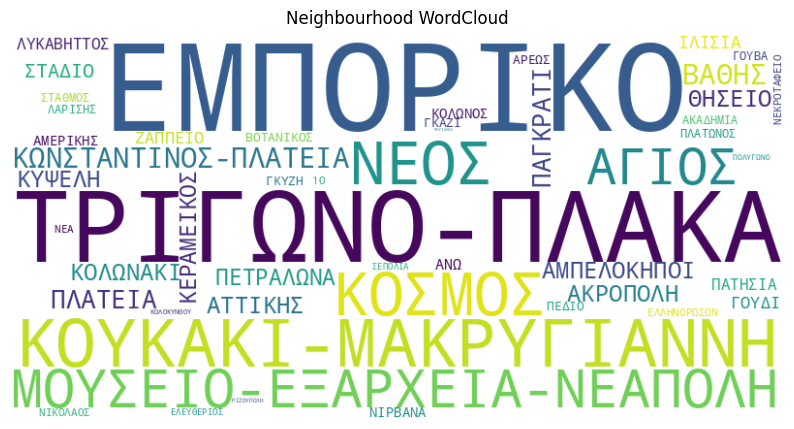

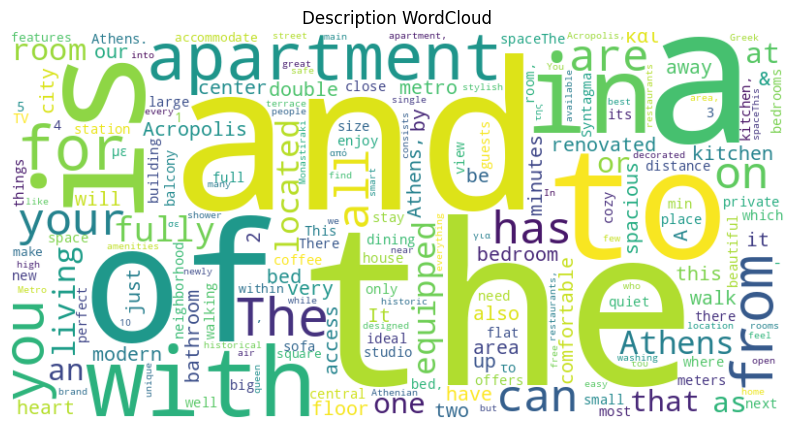

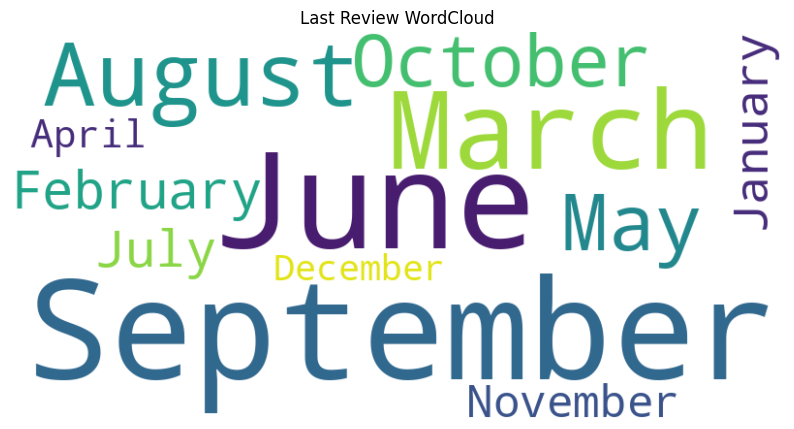

In [191]:
neighbourhood_text = ' '.join(year2023['neighbourhood_cleansed'].dropna().astype(str))
generate_wordcloud(neighbourhood_text, 'Neighbourhood WordCloud')

description_text = ' '.join(year2023['description'].dropna().astype(str))
generate_wordcloud(description_text, 'Description WordCloud')

last_review_text = ' '.join(pd.to_datetime(year2023['last_review'].dropna().astype(str)).dt.strftime('%B'))
generate_wordcloud(last_review_text, 'Last Review WordCloud')

#### Year 2023 Last Review WordCloud

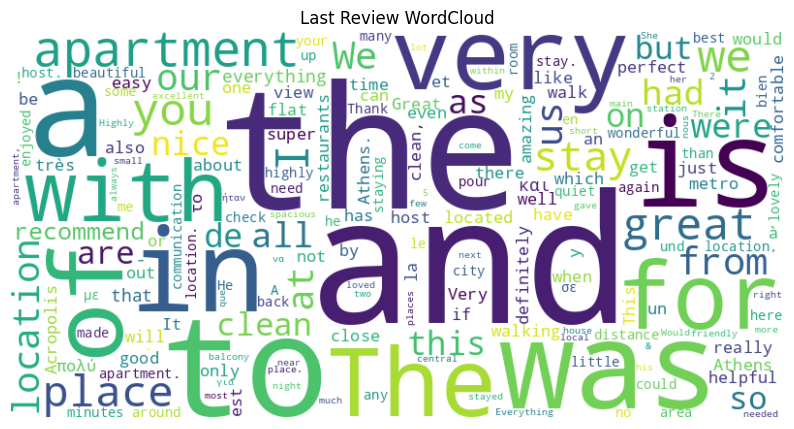

In [192]:
last_review_text = ' '.join(year2023_reviews['comments'].dropna().astype(str))
generate_wordcloud(last_review_text, 'Last Review WordCloud')

### 1.11 Distribution of simplified amenities categories

- Simplifies amenities into predefined categories.
- Assigns categories to amenities based on predefined lists.
- Displays the distribution of simplified amenities categories.


In [193]:
year2019['amenities_category'] = 'Other'

categories = {
    'kitchen': ['Breakfast', 'Cooking basics', 'BBQ', 'grill', 'oven', 'Coffee maker'],
    'accessibility': ['Accessible-height bed', 'Accessible-height toilet', 'Wide doorway', 'Wide hallway clearance'],
    'Electricity_and_Technology': ['EV charger', 'Ethernet connection', 'Game console', 'Projector and screen'],
    'facilities': ['Private entrance', 'Private living room', 'Lock on bedroom door', 'Outlet covers', 'Window guards'],
    'kids_friendly': ['Baby bath', 'Baby monitor', 'Changing table', 'Children’s books and toys', 'High chair'],
    'security': ['Security cameras', 'Fire extinguisher', 'First aid kit', 'Safety card', 'Smoke detector'],
    'services': ['Self check-in', 'Luggage dropoff allowed', 'Long term stays allowed', 'Pets allowed']
}

for category, items in categories.items():
    year2019.loc[year2019['amenities'].str.contains('|'.join(items)), 'amenities_category'] = category
print(year2019['amenities_category'].unique())

['services' 'security' 'kitchen' 'Other' 'facilities'
 'Electricity_and_Technology' 'kids_friendly' 'accessibility']


<ipython-input-194-2adbbd5ee762>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year2019, x='amenities_category', palette='Set2')


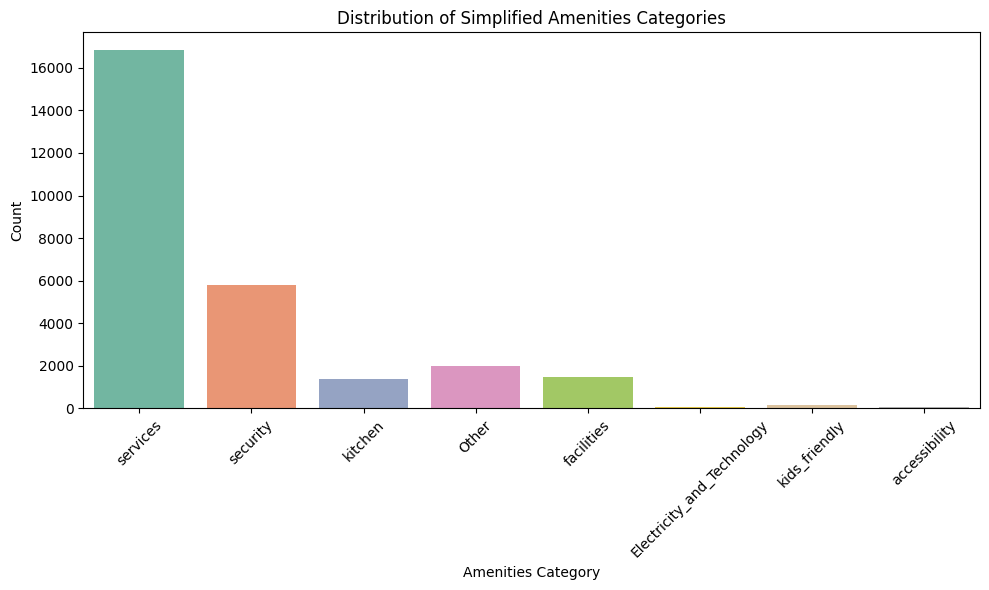

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(data=year2019, x='amenities_category', palette='Set2')
plt.title('Distribution of Simplified Amenities Categories')
plt.xlabel('Amenities Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Year 2023

In [195]:
year2019['amenities_category'] = 'Other'

categories = {
    'kitchen': ['Breakfast', 'Cooking basics', 'BBQ', 'grill', 'oven', 'Coffee maker'],
    'accessibility': ['Accessible-height bed', 'Accessible-height toilet', 'Wide doorway', 'Wide hallway clearance'],
    'Electricity_and_Technology': ['EV charger', 'Ethernet connection', 'Game console', 'Projector and screen'],
    'facilities': ['Private entrance', 'Private living room', 'Lock on bedroom door', 'Outlet covers', 'Window guards'],
    'kids_friendly': ['Baby bath', 'Baby monitor', 'Changing table', 'Children’s books and toys', 'High chair'],
    'security': ['Security cameras', 'Fire extinguisher', 'First aid kit', 'Safety card', 'Smoke detector'],
    'services': ['Self check-in', 'Luggage dropoff allowed', 'Long term stays allowed', 'Pets allowed']
}

for category, items in categories.items():
    year2023.loc[year2023['amenities'].str.contains('|'.join(items)), 'amenities_category'] = category
print(year2023['amenities_category'].unique())

['services' 'kitchen' 'security' nan 'kids_friendly' 'facilities'
 'Electricity_and_Technology']


<ipython-input-196-0bb017450931>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year2023, x='amenities_category', palette='Set2')


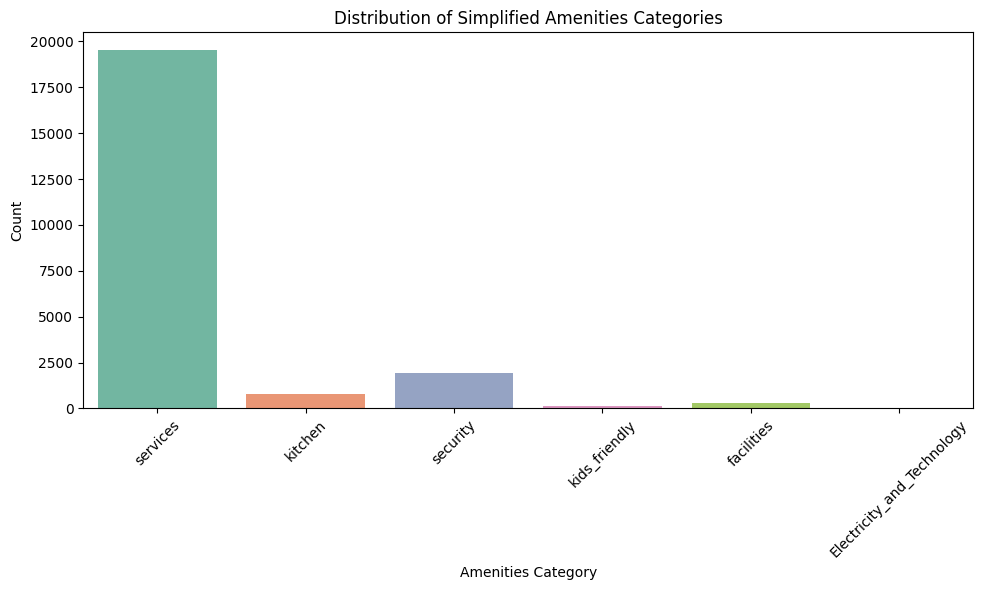

In [196]:
plt.figure(figsize=(10, 6))
sns.countplot(data=year2023, x='amenities_category', palette='Set2')
plt.title('Distribution of Simplified Amenities Categories')
plt.xlabel('Amenities Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.12 Mean for 2 people room per neighbourhood

- Selects rooms accommodating 2 people.
- Calculates mean price per neighborhood for filtered rooms.
- Displays mean price per neighborhood as a horizontal bar chart.


#### Year 2019

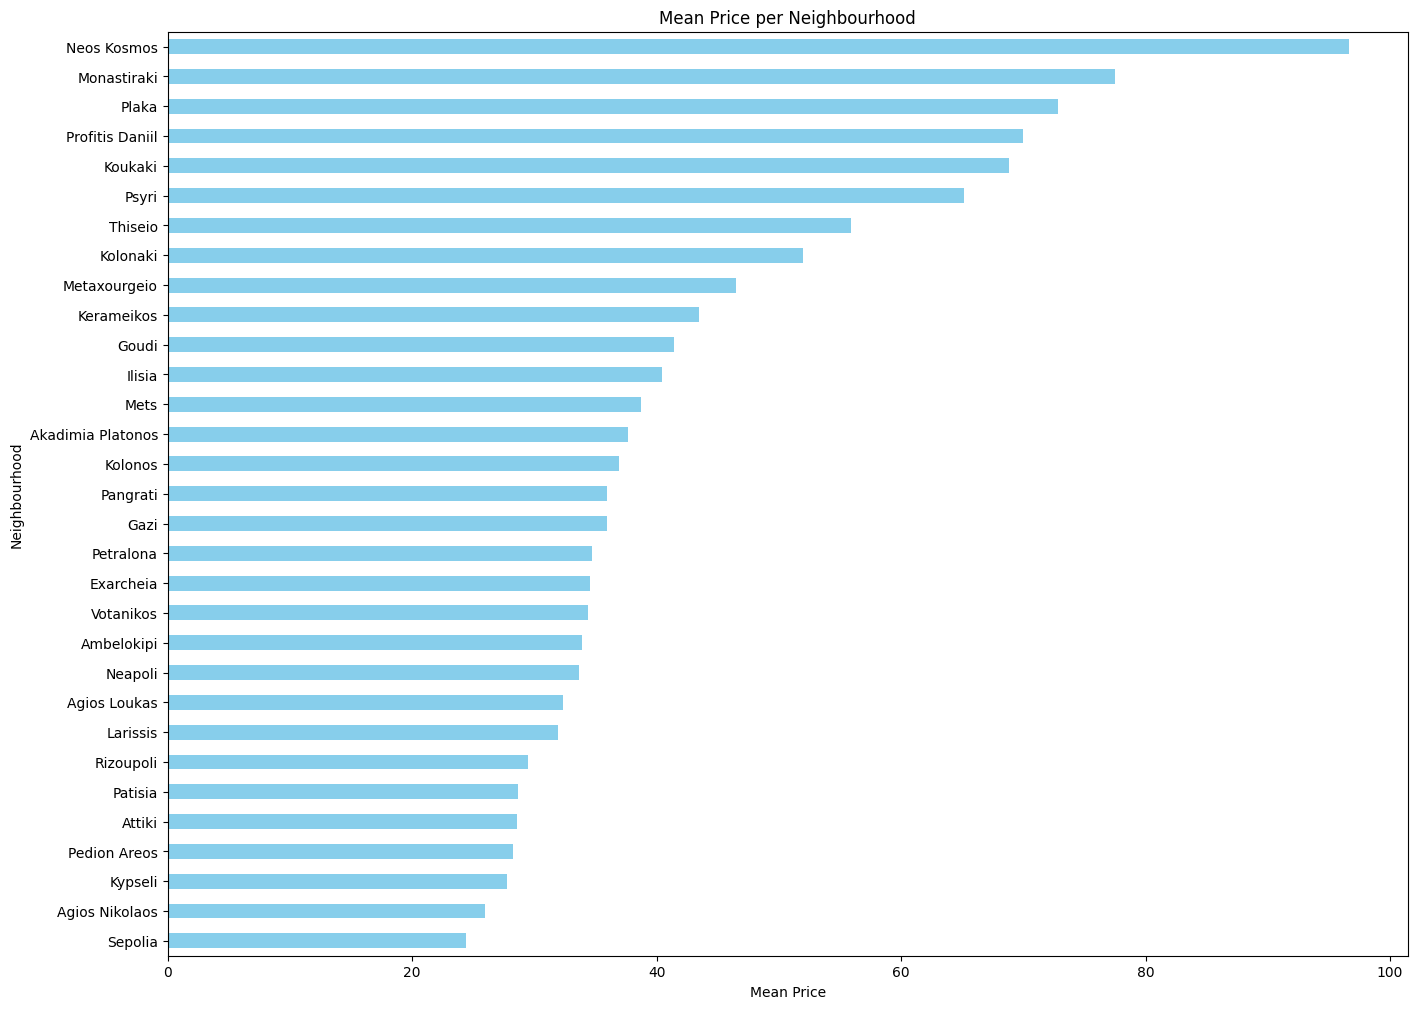

neighbourhood
Sepolia               Οικονομικές
Agios Nikolaos        Οικονομικές
Kypseli               Οικονομικές
Pedion Areos          Οικονομικές
Attiki                Οικονομικές
Patisia               Οικονομικές
Rizoupoli             Οικονομικές
Larissis              Οικονομικές
Agios Loukas              Μέτριες
Neapoli                   Μέτριες
Ambelokipi                Μέτριες
Votanikos                 Μέτριες
Exarcheia                 Μέτριες
Petralona                 Μέτριες
Gazi                      Μέτριες
Pangrati                  Μέτριες
Kolonos                   Μέτριες
Akadimia Platonos         Μέτριες
Mets                      Μέτριες
Ilisia                    Μέτριες
Goudi                     Μέτριες
Kerameikos                Μέτριες
Metaxourgeio              Μέτριες
Kolonaki             Πολύ Ακριβές
Thiseio              Πολύ Ακριβές
Psyri                Πολύ Ακριβές
Koukaki              Πολύ Ακριβές
Profitis Daniil      Πολύ Ακριβές
Plaka                Πολύ Ακριβές


In [197]:
filtered_rooms = year2019[year2019['accommodates'] == 2]

mean_price_per_neighbourhood = filtered_rooms.groupby('neighbourhood')['price'].mean().sort_values()

plt.figure(figsize=(16, 12))
mean_price_per_neighbourhood.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhood')
plt.title('Mean Price per Neighbourhood')
plt.show()

q1 = mean_price_per_neighbourhood.quantile(0.25)
q3 = mean_price_per_neighbourhood.quantile(0.75)

def categorize_neighbourhood(price):
    if price < q1:
        return 'Οικονομικές'
    elif price < q3:
        return 'Μέτριες'
    else:
        return 'Πολύ Ακριβές'

neighbourhood_categories = mean_price_per_neighbourhood.apply(categorize_neighbourhood)

print(neighbourhood_categories)

#### Year 2023

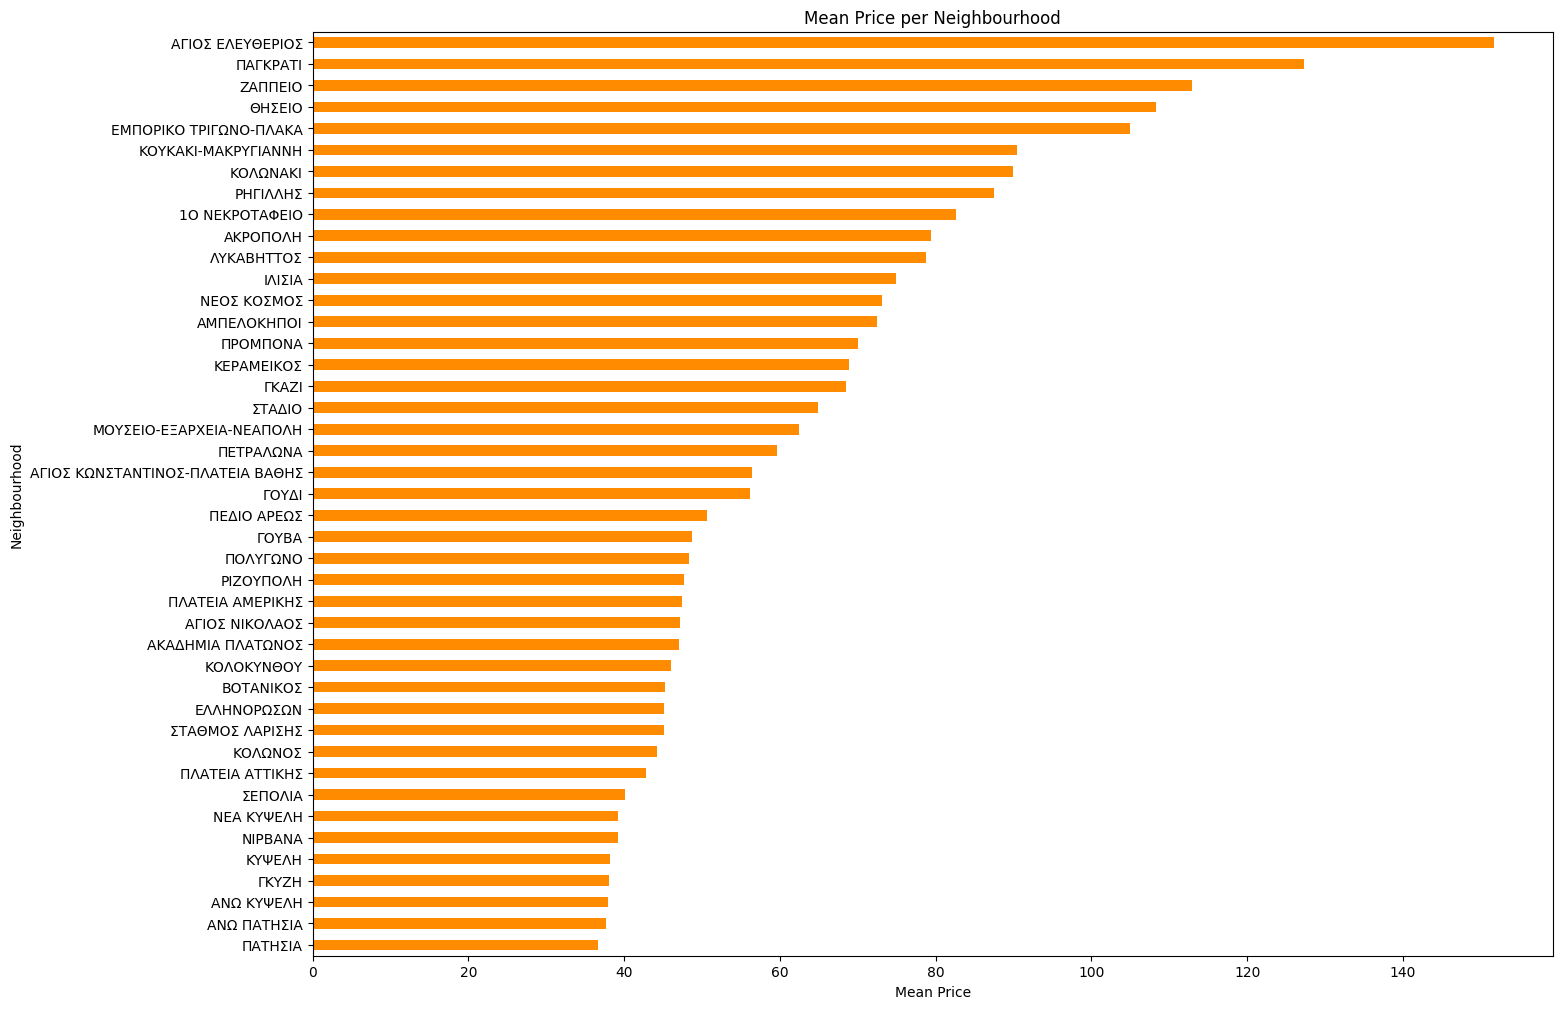

neighbourhood_cleansed
ΠΑΤΗΣΙΑ                              Οικονομικές
ΑΝΩ ΠΑΤΗΣΙΑ                          Οικονομικές
ΑΝΩ ΚΥΨΕΛΗ                           Οικονομικές
ΓΚΥΖΗ                                Οικονομικές
ΚΥΨΕΛΗ                               Οικονομικές
ΝΙΡΒΑΝΑ                              Οικονομικές
ΝΕΑ ΚΥΨΕΛΗ                           Οικονομικές
ΣΕΠΟΛΙΑ                              Οικονομικές
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      Οικονομικές
ΚΟΛΩΝΟΣ                              Οικονομικές
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                      Οικονομικές
ΕΛΛΗΝΟΡΩΣΩΝ                              Μέτριες
ΒΟΤΑΝΙΚΟΣ                                Μέτριες
ΚΟΛΟΚΥΝΘΟΥ                               Μέτριες
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                        Μέτριες
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                           Μέτριες
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                         Μέτριες
ΡΙΖΟΥΠΟΛΗ                                Μέτριες
ΠΟΛΥΓΩΝΟ                                 Μέτριες
ΓΟΥΒΑ                                    Μέτρι

In [198]:
filtered_rooms = year2023[year2023['accommodates'] == 2]

mean_price_per_neighbourhood = filtered_rooms.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

plt.figure(figsize=(16, 12))
mean_price_per_neighbourhood.plot(kind='barh', color='darkorange')
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhood')
plt.title('Mean Price per Neighbourhood')
plt.show()

q1 = mean_price_per_neighbourhood.quantile(0.25)
q3 = mean_price_per_neighbourhood.quantile(0.75)

def categorize_neighbourhood(price):
    if price < q1:
        return 'Οικονομικές'
    elif price < q3:
        return 'Μέτριες'
    else:
        return 'Πολύ Ακριβές'

neighbourhood_categories = mean_price_per_neighbourhood.apply(categorize_neighbourhood)

print(neighbourhood_categories)

### 1.13 3 Additional question for Athens

#### (1) How does the number of reviews correlate with the review scores

- Groups data by neighborhood, calculating mean review scores and total number of reviews for each.
- Calculates correlation between number of reviews and review scores.
- Creates scatter plot showing relationship between review scores and number of reviews across neighborhoods in Athens.


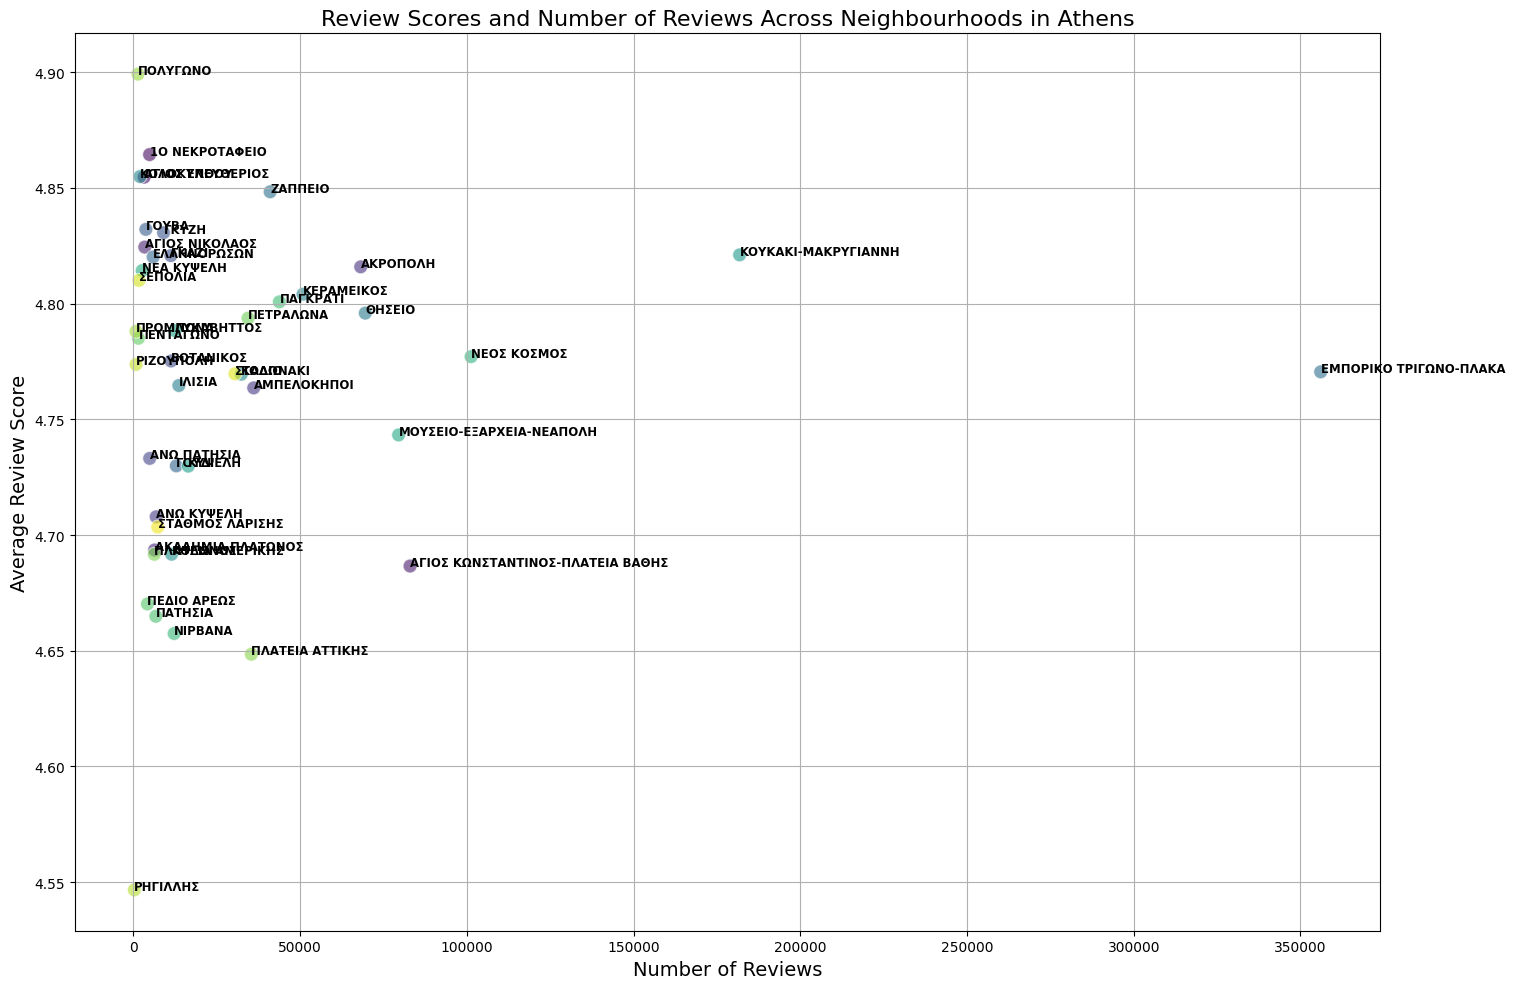

In [199]:
neighbourhood_data = year2023.groupby('neighbourhood_cleansed').agg({
    'review_scores_rating': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()

correlation = neighbourhood_data[['number_of_reviews', 'review_scores_rating']].corr().iloc[0, 1]

plt.figure(figsize=(14, 10))
sns.scatterplot(data=neighbourhood_data, x='number_of_reviews', y='review_scores_rating', hue='neighbourhood_cleansed', palette='viridis', s=100, alpha=0.6, edgecolor='w', legend=None)
plt.title('Review Scores and Number of Reviews Across Neighbourhoods in Athens', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.grid(True)
plt.tight_layout()

for line in range(0, neighbourhood_data.shape[0]):
    plt.text(neighbourhood_data.number_of_reviews[line], neighbourhood_data.review_scores_rating[line],
             neighbourhood_data.neighbourhood_cleansed[line], horizontalalignment='left', size='small', color='black', weight='semibold')

plt.show()

#### (2) Do hosts with verified identities and profile pictures receive better ratings or more bookings

- Groups data by host identity verification status, calculating mean number of reviews.
- Groups data by host profile picture presence, calculating mean number of reviews.
- Changing 'f' , 't' values in boolean fields 'host_identity__verified' , 'host_has_profile_pic' to 'False' , 'True'
- Displays average number of reviews based on host identity verification and profile picture presence.


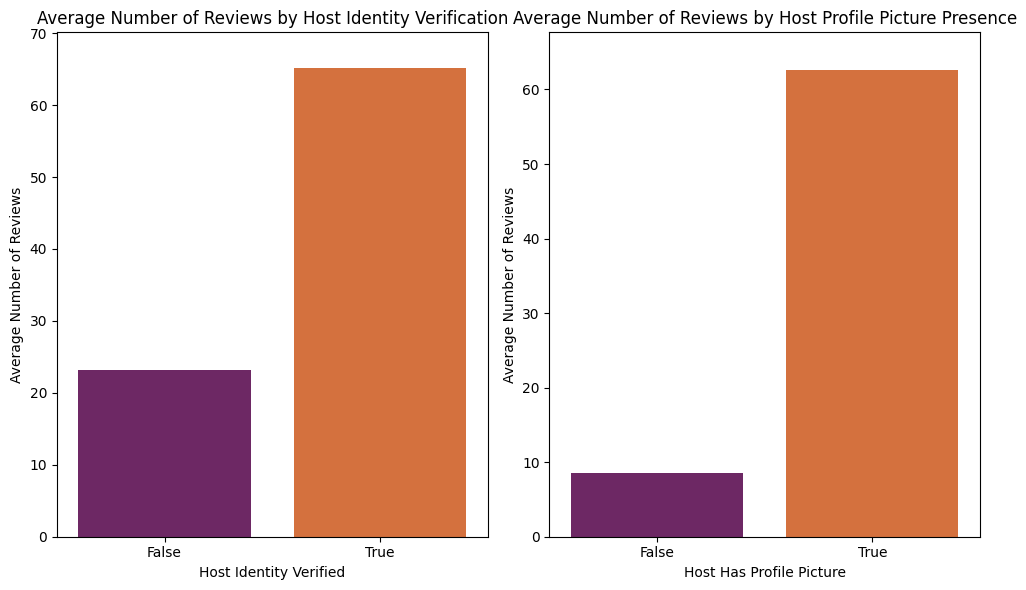

In [200]:
identity_group = year2023.groupby('host_identity_verified')['number_of_reviews'].mean().reset_index()
identity_group['host_identity_verified'] = identity_group['host_identity_verified'].replace({'f': 'False', 't': 'True'})

profile_pic_group = year2023.groupby('host_has_profile_pic')['number_of_reviews'].mean().reset_index()
profile_pic_group['host_has_profile_pic'] = profile_pic_group['host_has_profile_pic'].replace({'f': 'False', 't': 'True'})

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=identity_group, x='host_identity_verified', y='number_of_reviews', hue='host_identity_verified', palette='inferno', dodge=False, legend=False)
plt.title('Average Number of Reviews by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Number of Reviews')
plt.ylim(0, identity_group['number_of_reviews'].max() + 5)

plt.subplot(1, 2, 2)
sns.barplot(data=profile_pic_group, x='host_has_profile_pic', y='number_of_reviews', hue='host_has_profile_pic', palette='inferno', dodge=False, legend=False)
plt.title('Average Number of Reviews by Host Profile Picture Presence')
plt.xlabel('Host Has Profile Picture')
plt.ylabel('Average Number of Reviews')
plt.ylim(0, profile_pic_group['number_of_reviews'].max() + 5)

plt.tight_layout()
plt.show()

#### (3) What is the relationship between the instant bookable feature and the review score

- Groups data by instant bookable status, calculating mean review scores.
- Changing 'f' , 't' values in boolean field 'instant_bookable' to 'False' , 'True'
- Displays average review scores based on instant bookable feature.


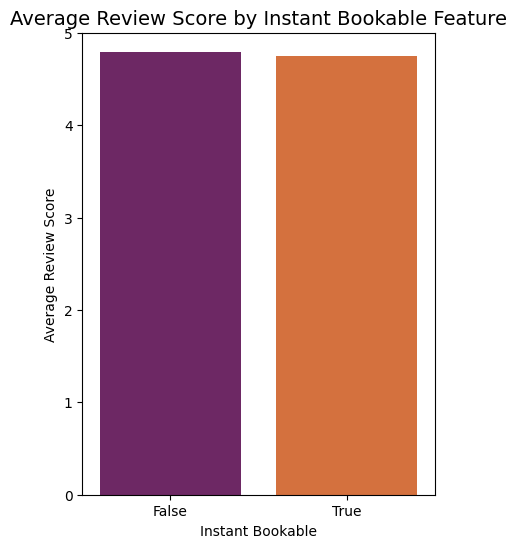

In [201]:
instant_bookable_group = year2023.groupby('instant_bookable')['review_scores_rating'].mean().reset_index()
instant_bookable_group['instant_bookable'] = instant_bookable_group['instant_bookable'].replace({'f': 'False', 't': 'True'})

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=instant_bookable_group, x='instant_bookable', y='review_scores_rating', hue='instant_bookable', palette='inferno', dodge=False, legend=False)
plt.title('Average Review Score by Instant Bookable Feature', fontsize=14)
plt.xlabel('Instant Bookable')
plt.ylabel('Average Review Score')
plt.ylim(0, 5)
plt.show()

### 1.14 Top 10 Hosts with most listings

- Counts number of listings per host.
- Selects top 10 hosts with most listings.
- Displays a pie chart showing distribution of listings among top 10 hosts.


#### Year 2019 Top 10 hosts

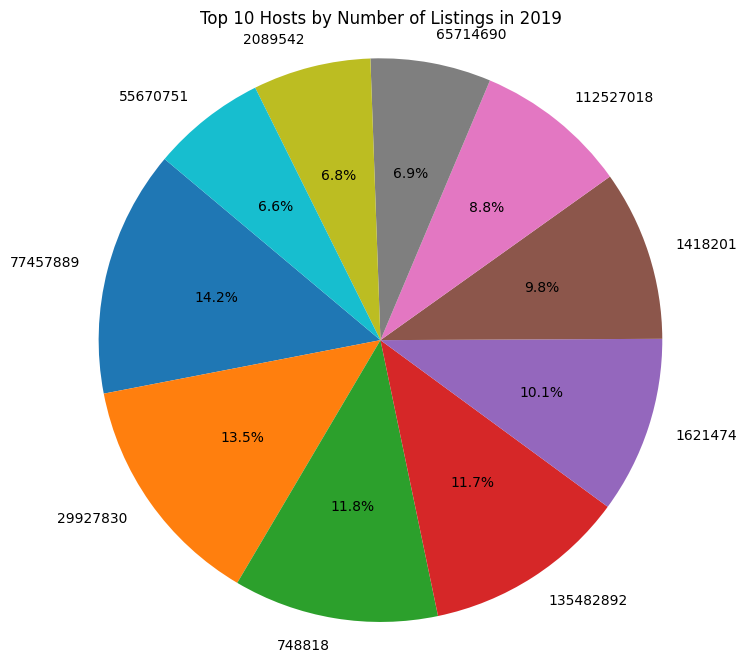

In [202]:
host_listings_count = year2019['host_id'].value_counts()

sorted_hosts = host_listings_count.sort_values(ascending=False)

top_10_hosts = sorted_hosts.head(10)

labels = top_10_hosts.index
sizes = top_10_hosts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Hosts by Number of Listings in 2019')
plt.axis('equal')

plt.show()

#### Year 2023 Top 10 hosts

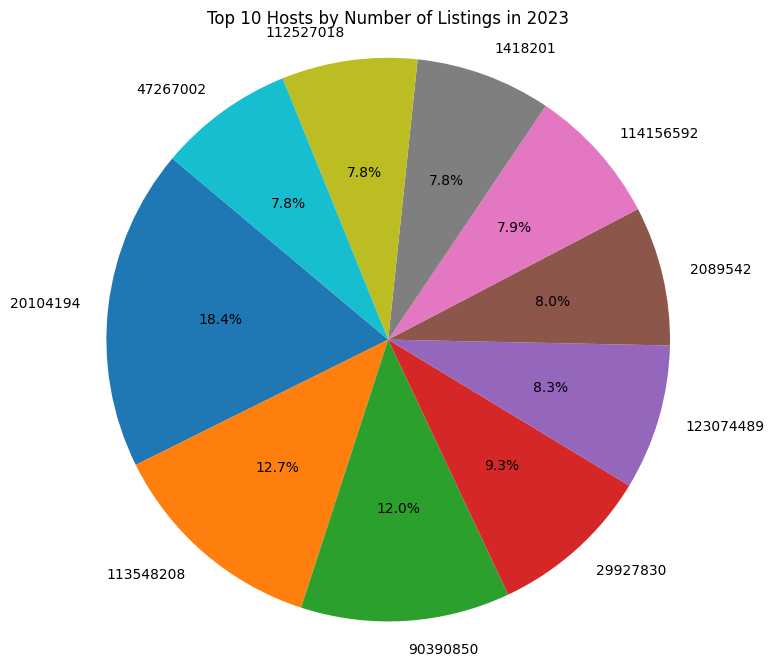

In [203]:
host_listings_count = year2023['host_id'].value_counts()

sorted_hosts = host_listings_count.sort_values(ascending=False)

top_10_hosts = sorted_hosts.head(10)

labels = top_10_hosts.index
sizes = top_10_hosts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Hosts by Number of Listings in 2023')
plt.axis('equal')

plt.show()

### 1.15 Conclusions drawn from the data mining performed on the 2 datasets 2019 , 2023

- (1.1) Most frequent room type seems to remain the same for both years
- (1.2) All 3 months have increased mean prices for year 2023
- (1.8) The most expensive room type in year 2023 is valued at mean price 316.17 in comparison with 81.06
- Neighbourhood 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ ΠΛΑΚΑ', appears to be the most frequently listed for both years
- The most frequent room type 'entire home/apt' remained the same for both years
- The entries appear to be way more in year 2019 than 2023

## Part 2 - Recommendation system

### Generate word cloud with stopwords

- Defines a function to generate word clouds with stopwords removal.
- Prepares a list of stopwords, including common English words and additional ones.
- Extracts and preprocesses description text data from 2019.
- Generates a word cloud from the description text with stopwords removed.


In [204]:
def generate_wordcloud_with_stopwords(data, title,stopwords):
    data = data.split(' ')
    data = [word for word in data if word not in stopwords]
    word_freq = Counter(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

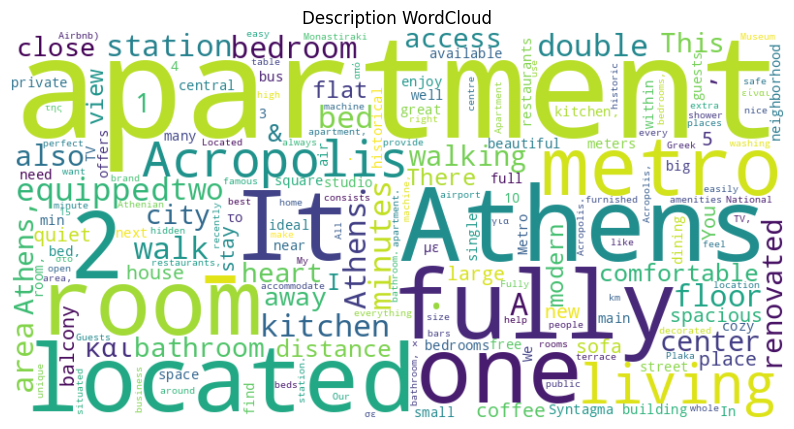

In [205]:
s = stopwords.words('english')
s.append("a")
s.append("all")
s.append("of")
s.append("the")
s.append("The")
s.append("and")

description_text = ' '.join(year2019['description'].dropna().astype(str))
generate_wordcloud_with_stopwords(description_text, 'Description WordCloud', s)


### Create a new column for the index

- Selects relevant columns (id, name, description) from the 2019 dataset for recommendations.
- Combines name and description columns to create a unified index for recommendation.
- Defines a function to process the index text by removing HTML tags, special characters, and numbers, and converting to lowercase.
- Applies the text processing function to the index column of the recommendation dataset.


In [206]:
recommendation_dataset = year2019[['id', 'name', 'description']]

In [207]:
recommendation_dataset.loc[:,'index'] = recommendation_dataset.loc[:,'name'] + ' ' + recommendation_dataset.loc[:,'description']


<ipython-input-207-b112699aa30c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendation_dataset.loc[:,'index'] = recommendation_dataset.loc[:,'name'] + ' ' + recommendation_dataset.loc[:,'description']


In [208]:
def process_index(text):
    t = str(text)

    pattern = r'[^\w\s]'

    clean_string = remove_html_tags(t)

    clean_string = re.sub(pattern, '', t)

    pattern = r'\b\w*\d\w*\b'

    clean_string = re.sub(pattern, '', t)

    clean_string = clean_string.lower()

    return clean_string

recommendation_dataset.loc[:,'index'] = recommendation_dataset['index'].apply(process_index)

<ipython-input-158-6d22c7e2becc>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### TF-IDF vectorization

- Initializes TF-IDF vectorizers for unigrams and bigrams with English stopwords removal.
- Transforms the recommendation dataset's index using both unigram and bigram vectorizers.
- Plots the dimensions of the vectorization space, including the number of documents, unigrams, and bigrams.


In [209]:
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')

In [210]:
unigram_matrix = unigram_vectorizer.fit_transform(recommendation_dataset['index'])

bigram_matrix = bigram_vectorizer.fit_transform(recommendation_dataset['index'])

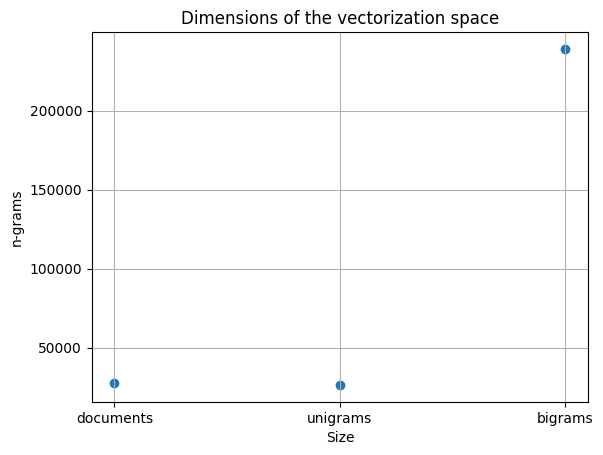

In [211]:
x = ['documents', 'unigrams', 'bigrams']
y = [unigram_matrix.shape[0], unigram_matrix.shape[1],  bigram_matrix.shape[1]]

plt.scatter(x, y)

plt.xlabel('Size')
plt.ylabel('n-grams')
plt.title('Dimensions of the vectorization space')

plt.grid(True)
plt.show()

### Calculate distance matrix with metric: cosine similarity

- Computes cosine similarity matrices for unigrams and bigrams.
- Prints the shape of the computed distance matrices.
- Samples a portion of the distance matrix for further processing.
- Makes the diagonal -inf , in order to not consider duplicate data.
- Iterates to find the most similar documents based on cosine similarity.
- Prints the index and similarity score of the most similar document pairs.


In [212]:
unigram_distance_matrix = cosine_similarity(unigram_matrix)

bigram_distance_matrix = cosine_similarity(bigram_matrix)

In [213]:
print(unigram_distance_matrix.shape)

print(bigram_distance_matrix.shape)

(27820, 27820)
(27820, 27820)


#### Unigram

In [214]:
sample = np.copy(unigram_distance_matrix[:1000,:1000])

np.fill_diagonal(sample, np.NINF)

result = {}
for _ in range(100):
    max_index = np.unravel_index(np.argmax(sample), sample.shape)
    max_value = sample[max_index]

    sample[max_index[0], max_index[1]] = np.NINF
    sample[max_index[1], max_index[0]] = np.NINF

    result[max_index] = max_value

    print("index: " , max_index, " similarity: " , round(max_value,7))

index:  (222, 251)  similarity:  1.0
index:  (43, 119)  similarity:  0.993918
index:  (795, 826)  similarity:  0.9934432
index:  (253, 255)  similarity:  0.9924626
index:  (66, 119)  similarity:  0.9913879
index:  (43, 66)  similarity:  0.9893512
index:  (28, 29)  similarity:  0.98379
index:  (530, 880)  similarity:  0.9826967
index:  (337, 753)  similarity:  0.9741632
index:  (562, 564)  similarity:  0.9726201
index:  (389, 391)  similarity:  0.9702384
index:  (560, 564)  similarity:  0.9671682
index:  (164, 256)  similarity:  0.9655816
index:  (245, 523)  similarity:  0.9639504
index:  (248, 254)  similarity:  0.9614361
index:  (79, 563)  similarity:  0.9610722
index:  (160, 161)  similarity:  0.9598047
index:  (165, 255)  similarity:  0.9593346
index:  (165, 253)  similarity:  0.9576114
index:  (560, 562)  similarity:  0.9536985
index:  (567, 568)  similarity:  0.9485838
index:  (29, 73)  similarity:  0.9386014
index:  (222, 941)  similarity:  0.9380836
index:  (251, 941)  similarit

#### Bigram

In [215]:
sample = np.copy(bigram_distance_matrix[:1000,:1000])

np.fill_diagonal(sample, np.NINF)

result = {}
for _ in range(100):
    max_index = np.unravel_index(np.argmax(sample), sample.shape)
    max_value = sample[max_index]

    sample[max_index[0], max_index[1]] = np.NINF
    sample[max_index[1], max_index[0]] = np.NINF

    result[max_index] = max_value

    print("index: " , max_index, " similarity: " , round(max_value,7))

index:  (795, 826)  similarity:  0.9902799
index:  (222, 251)  similarity:  0.9753106
index:  (530, 880)  similarity:  0.9749871
index:  (337, 753)  similarity:  0.9723659
index:  (253, 255)  similarity:  0.9715298
index:  (28, 29)  similarity:  0.9691288
index:  (389, 391)  similarity:  0.9564261
index:  (43, 119)  similarity:  0.9564196
index:  (160, 161)  similarity:  0.9492103
index:  (66, 119)  similarity:  0.9461236
index:  (823, 839)  similarity:  0.9455156
index:  (165, 253)  similarity:  0.9454224
index:  (43, 66)  similarity:  0.9434685
index:  (165, 255)  similarity:  0.9409146
index:  (245, 523)  similarity:  0.9357735
index:  (79, 563)  similarity:  0.9272276
index:  (248, 254)  similarity:  0.924705
index:  (29, 73)  similarity:  0.9203113
index:  (560, 562)  similarity:  0.9133731
index:  (562, 564)  similarity:  0.9095329
index:  (164, 256)  similarity:  0.9006808
index:  (354, 357)  similarity:  0.899912
index:  (603, 609)  similarity:  0.8979675
index:  (213, 216)  si

### Recommendation system

- Identifies the index of the listing with ID 1479754 in the recommendation dataset.
- Prepares the query based on the identified listing index.
- Defines a function to recommend similar listings based on a given listing ID.
- Finds similar listings by iterating over the cosine similarity matrix and printing the most similar listings along with their similarity scores.


#### Unigram

In [216]:
listing_id = 1479754

listing_index = recommendation_dataset.loc[recommendation_dataset['id'] == listing_id].index[0]

query = recommendation_dataset.loc[listing_index]

print(query)

print('-------------------------------------------------------------')

def recommend(listing_id, num = 5):
    listing_index = recommendation_dataset.loc[recommendation_dataset['id'] == listing_id].index[0]

    sample = np.copy(unigram_distance_matrix[listing_index])

    for i in range(num + 1):
        max_index = np.unravel_index(np.argmax(sample), sample.shape)
        max_value = sample[max_index]

        sample[max_index] = np.NINF

        if i == 0:
            continue

        print('-------------------------------------------------------------')
        print(f"Hit {i}: {max_value:.7f} - listing index: {max_index[0]} ")

        room = recommendation_dataset.loc[max_index]

        print(room)

recommend(listing_id, 5)

id                                                       1479754
name                        Lovely studio in the heart of Athens
description    The studio (22 m2) is on the 2nd floor of the ...
index          lovely studio in the heart of athens the studi...
Name: 253, dtype: object
-------------------------------------------------------------
-------------------------------------------------------------
Hit 1: 1.0000000 - listing index: 9878 
id                                                       1192692
name                   Whimsical apartment with Zeus Temple view
description    My apartment shares the exact same, unobstruct...
index          whimsical apartment with zeus temple view my a...
Name: 9878, dtype: object
-------------------------------------------------------------
Hit 2: 1.0000000 - listing index: 18731 
id                                                      32160378
name           METRO KERAMEIKOS APT - by Metro Kerameikos sta...
description    Metro Kerameikos 

#### Bigram

In [217]:
listing_id = 1479754

listing_index = recommendation_dataset.loc[recommendation_dataset['id'] == listing_id].index[0]

query = recommendation_dataset.loc[listing_index]

print(query)

print('-------------------------------------------------------------')

def recommend(listing_id, num = 5):
    listing_index = recommendation_dataset.loc[recommendation_dataset['id'] == listing_id].index[0]

    sample = np.copy(bigram_distance_matrix[listing_index])

    for i in range(num + 1):
        max_index = np.unravel_index(np.argmax(sample), sample.shape)
        max_value = sample[max_index]

        sample[max_index] = np.NINF

        if i == 0:
            continue

        print('-------------------------------------------------------------')
        print(f"Hit {i}: {max_value:.7f} - listing index: {max_index[0]} ")

        room = recommendation_dataset.loc[max_index]

        print(room)

recommend(listing_id, 5)

id                                                       1479754
name                        Lovely studio in the heart of Athens
description    The studio (22 m2) is on the 2nd floor of the ...
index          lovely studio in the heart of athens the studi...
Name: 253, dtype: object
-------------------------------------------------------------
-------------------------------------------------------------
Hit 1: 1.0000000 - listing index: 9878 
id                                                       1192692
name                   Whimsical apartment with Zeus Temple view
description    My apartment shares the exact same, unobstruct...
index          whimsical apartment with zeus temple view my a...
Name: 9878, dtype: object
-------------------------------------------------------------
Hit 2: 1.0000000 - listing index: 18731 
id                                                      32160378
name           METRO KERAMEIKOS APT - by Metro Kerameikos sta...
description    Metro Kerameikos 